# It's the quantization version for v5

In [1]:
from IPython.display import Image
from os import chdir
import numpy as np
import tables as tb
import gudhi as gd
import matplotlib.pyplot as plt
import matplotlib
import time

In [2]:
# read the file
file_name = "function_rips_with_threshold_100_1"
#file_name="fig3-2"
rank_dim = 0
#grid_size=10

simplices = []
vertice_id = 0
i = 0

x_values = []
y_values = []

for line in open("../cgta_paper_2021/function_rips/"+file_name+".scc"):
#for line in open("./data/"+file_name+".txt"):
    if(line[0]!='#'):
        
        if(i<=1):
            i=i+1
            continue
            
        elif(i==2):
            rank_num=[] # sizes of generating sets
            for j in line.split():
                rank_num.append(int(j))
            i=i+1
            rank_num=rank_num[:-1]
            print("rank_num=",rank_num)
        else:
            block = line.split(';')
            grid = block[0].split()
            grid_x = float(grid[0])
            grid_y = float(grid[1])
            #grid_x = int(float(grid[0])*20)
            #grid_y = int(float(grid[1])*20)
            x_values.append(grid_x)
            y_values.append(grid_y)
            
            
            if len(block)>1:
                face = block[1].split()
                for j in range(len(face)):
                    face[j] = int(face[j])
                simplices.append([grid_x,grid_y,face])
                
            else:
                simplices.append([grid_x,grid_y,[vertice_id]])
                vertice_id += 1
            i=i+1   




simplex_tree = []
start_id=0
for i in range(len(rank_num)-1,-1,-1):
    simplices_i=[]
    for j in range(len(simplices)-start_id-rank_num[i],len(simplices)-start_id):
        simplices_i.append(simplices[j])
    start_id += rank_num[i]
    simplex_tree.append(simplices_i)
    


#transform face number to vertex number
for i in range(1,len(simplex_tree)):
    for j in range(len(simplex_tree[i])):
        simplex = simplex_tree[i][j]
        face = simplex[2]
        vertices=[]
        for face_id in face:
            vert = simplex_tree[i-1][face_id][2]
            for vert_id in vert:
                if vert_id not in vertices:
                    vertices.append(vert_id)
        simplex_tree[i][j][2]=vertices



## To verify the data structur
## simplices contain all the information we need
#print("the simplex tree:")
for i in range(len(simplex_tree)):
    for simplex in simplex_tree[i]:
        print(simplex)   

#print("len(simplex_tree)=",len(simplex_tree))
#for i in range(len(simplex_tree)):
#    print("length of simplex_tree",i,len(simplex_tree[i]))
#       


rank_num= [5, 10, 10, 5]
[0.0, -23.87324146378428, [0]]
[0.0, -23.87324146378428, [1]]
[0.0, -23.87324146378428, [2]]
[0.0, -23.87324146378428, [3]]
[0.0, -23.87324146378428, [4]]
[0.5011382653047594, -23.87324146378428, [4, 3]]
[0.7480490262529788, -23.87324146378428, [2, 1]]
[1.0901441034205996, -23.87324146378428, [2, 0]]
[1.1503998364786394, -23.87324146378428, [1, 0]]
[1.4168816258349657, -23.87324146378428, [4, 1]]
[1.572507047717775, -23.87324146378428, [4, 0]]
[1.602540165816185, -23.87324146378428, [3, 0]]
[1.7203143022224023, -23.87324146378428, [3, 1]]
[1.8419929814491458, -23.87324146378428, [4, 2]]
[1.9753468692247196, -23.87324146378428, [3, 2]]
[1.1503998364786394, -23.87324146378428, [2, 1, 0]]
[1.572507047717775, -23.87324146378428, [4, 1, 0]]
[1.602540165816185, -23.87324146378428, [4, 3, 0]]
[1.7203143022224023, -23.87324146378428, [3, 1, 0]]
[1.7203143022224023, -23.87324146378428, [4, 3, 1]]
[1.8419929814491458, -23.87324146378428, [4, 2, 0]]
[1.8419929814491458, -

start_order=time.time()
x_values_ordered = sorted(list({}.fromkeys(x_values).keys()))
end_order=time.time()
print("sorting x time",end_order-start_order)
y_values_ordered = sorted(list({}.fromkeys(y_values).keys()))
end2_order=time.time()
print("sorting y time",end2_order-start_order)

simplex_tree_integer=simplex_tree


for i in range(len(simplex_tree_integer)):
    for j in range(len(simplex_tree_integer[i])):
        #print("[i,j]",[i,j])
        simplex_tree_integer[i][j][0]=x_values_ordered.index(simplex_tree[i][j][0])
        simplex_tree_integer[i][j][1]=y_values_ordered.index(simplex_tree[i][j][1])
        #print("time of change value",end_change-start_change)

end_sti=time.time()
print("change value",end_sti-end2_order)


In [3]:

x_min=min(x_values)
y_min=min(y_values)
x_length = float(max(x_values)-x_min)
y_length = float(max(y_values)-y_min)


#if(x_length!=0 and y_length!=0):
#    end_point = [grid_size,round(y_length/x_length*grid_size+1)]

print("x_length",x_length)
print("y_length",y_length)




x_length 1.9753468692247196
y_length 0.0


In [4]:

x_range = 19
y_range = 19

end_point=[x_range,y_range]
print("end_point ",end_point)

x_interval = x_length/x_range
y_interval = y_length/y_range

simplex_tree_integer=simplex_tree

for i in range(len(simplex_tree_integer)):
    for j in range(len(simplex_tree_integer[i])):
        #print("[i,j]",[i,j])
        if(x_interval==0):
            simplex_tree_integer[i][j][0]=0
        else:
            simplex_tree_integer[i][j][0] = round((simplex_tree[i][j][0]-x_min)/x_interval)
            
        if(y_interval==0):
            simplex_tree_integer[i][j][1]=0
        else:
            simplex_tree_integer[i][j][1] = round((simplex_tree[i][j][1]-y_min)/y_interval)
        #print("time of change value",end_change-start_change)
        
for i in range(len(simplex_tree_integer)):
    for simplex in simplex_tree_integer[i]:
        print(simplex)

end_point  [19, 19]
[0, 0, [0]]
[0, 0, [1]]
[0, 0, [2]]
[0, 0, [3]]
[0, 0, [4]]
[5, 0, [4, 3]]
[7, 0, [2, 1]]
[10, 0, [2, 0]]
[11, 0, [1, 0]]
[14, 0, [4, 1]]
[15, 0, [4, 0]]
[15, 0, [3, 0]]
[17, 0, [3, 1]]
[18, 0, [4, 2]]
[19, 0, [3, 2]]
[11, 0, [2, 1, 0]]
[15, 0, [4, 1, 0]]
[15, 0, [4, 3, 0]]
[17, 0, [3, 1, 0]]
[17, 0, [4, 3, 1]]
[18, 0, [4, 2, 0]]
[18, 0, [4, 2, 1]]
[19, 0, [3, 2, 0]]
[19, 0, [3, 2, 1]]
[19, 0, [4, 3, 2]]
[17, 0, [4, 3, 1, 0]]
[18, 0, [4, 2, 1, 0]]
[19, 0, [3, 2, 1, 0]]
[19, 0, [4, 3, 2, 0]]
[19, 0, [4, 3, 2, 1]]


## Compute rank invariant

In [5]:
def create_stair(elbow, end_point):
    # stair a path passing through the elbow.
    stair = []
    
    if(elbow[0]==0 or elbow[1]==end_point[1]):
        for i in range(end_point[1]+1):
            stair.append([0,i])
        for j in range(1,end_point[0]+1):
            stair.append([j,i])
    else:
        for i in range(elbow[1]+1):
            stair.append([0,i])   # i=0
        for j in range(elbow[0]):
            stair.append([j+1,i]) # j=0
        for k in range(i+1, end_point[1]+1):
            stair.append([j+1,k]) # k=2,3
        for l in range(j+2, end_point[0]+1):
            stair.append([l,k])
    return stair

def compute_rk(i,j,k,l,barcodes,rank_dim):
# This function computes the value rank(s,t) where s=(i,j) and t = (k,l)
    if(i>k or j>l):
        return 0
    
    s_1 = i + j
    t_1 = k + l
    rank0_inv = 0
    rank1_inv = 0

    for barcode in barcodes:
        if(barcode[0]==0):
            if(barcode[1][0]<=s_1 and barcode[1][1]>t_1):
                rank0_inv = rank0_inv + 1
        elif(barcode[0]==1):
            if(barcode[1][0]<=s_1 and barcode[1][1]>t_1):
                rank1_inv = rank1_inv + 1
    if(rank_dim==0):
        return rank0_inv
    elif(rank_dim==1):
        return rank1_inv



In [6]:
def proj_grid_to_path(simplex, elbow, x_range, y_range):
    #simplex=[x,y,[face]]
    #elbow=[x,y]
    #print("========enter func=========")
    #if(elbow[0]==0 or elbow[1]==y_range):
    #    elbow=[0,y_range]
    x = simplex[0]
    y = simplex[1]
    x0 = elbow[0]
    y0 = elbow[1]
    

    if((x==0 and y<=y0) or (y==y0 and x<=x0) or (y>=y0 and x==x0) or (y==y_range and x>=x0)):
        proj_p=[x,y]
    elif(x<=x0 and y<=y0):
        proj_p= [x,y0]
    elif(x<=x0 and y>=y0):
        proj_p= [x0,y]
    else:
        proj_p= [x,y_range]
    return proj_p
    
# test

#print("simplex ",simplex_tree_integer[1][3])
#eb=[2,0]

#print("result ",proj_grid_to_path(simplex_tree_integer[1][3],eb,x_range,y_range))


def tensor2list_id(i,j,k,l,x_range,y_range): #TODO: debug
    # This function transform the coordinate (s,t) where s=(i,j) and t = (k,l) to id
    term1 = (2*x_range+3-i)*i*(y_range+2)*(y_range+1)/4
    term2 = (x_range+1-i)*(2*y_range+4-j)*(j-1)/2
    term3 = (y_range-j+1)*(k-i)+l-j
    return int((term1+term2+term3)/2) 

In [7]:

#grid is from (0,0)
#vertex index is from 0

#ri_len=int(x_range*y_range*(x_range+1)*(y_range+1)/4) # if 1000000 simplices, ri_len = e11
#print("rank inv list len",ri_len)
#rank_inv = [0]*ri_len
rank_inv = np.array(np.zeros((x_range+1,y_range+1,x_range+1,y_range+1)))


st = gd.SimplexTree()
#result_rank_fn="./result/rank1_invariance_for_"+file_name+".txt"
#f_rank = f.open(result_rank_fn,"w")



#Scan all the elbows
for i in range(x_range+1):
    for j in range(y_range+1):
        elbow = [i,j]
        print("elbow",elbow)
        start_time=time.time()
        #print("time: start building a simplex tree",time.time())
        stair = create_stair(elbow, end_point)
        end_stair=time.time()
        print("time of creating a stair is ",end_stair-start_time,"s")
        #print("stair",stair)

        # Build the simplex tree
        
        for ii in range(len(simplex_tree_integer)): #4
            for jj in range(len(simplex_tree_integer[ii])): #[37961, 36515, 20524, 5000]
                
                start_loop = time.time()
                simplex = simplex_tree_integer[ii][jj]
                #print("simplex",simplex)
                #print("elbow",elbow)
                start_grid_id=time.time()
                #####################
                #for grid_id in stair:
                #    if simplex[0]<=grid_id[0] and simplex[1]<=grid_id[1]:
                #        #print("proj_correct ",grid_id)
                #        filtration_value = grid_id[0]+grid_id[1] #TODO
                #        #print("filtration_value_correct",filtration_value)
                #        start_insert=time.time()
                #        #print("time enter insert/assign ", time.asctime( time.localtime(time.time())))
                #        if((st.insert(simplex[2], filtration = filtration_value))==False): #TODO:optimize with C++, we don't have the funciton for Python
                #            #print("time finish insert",time.asctime( time.localtime(time.time())))
                #            end_insert=time.time()
                #            st.assign_filtration(simplex[2], filtration = filtration_value)
                #            end_assign=time.time()
                #            #print("assign time",end_assign-end_insert,"s")
                #        else:
                #            end_insert=time.time()
                #        #print("insert time",end_insert-start_insert,"s")
                #        break
                ####################
                #filtration_value = proj_grid_to_path(simplex, elbow, x_range, y_range)
                proj_p = proj_grid_to_path(simplex, elbow, x_range, y_range)
                #print("grid_node=",simplex[0],simplex[1])
                #print("proj_P=",proj_p)
                
                filtration_value=proj_p[0]+proj_p[1]
                #print("proj_p",proj_p)
                #print("====================")
                #print("filtration_value ",filtration_value)
                if((st.insert(simplex[2], filtration = filtration_value))==False):
                    st.assign_filtration(simplex[2], filtration = filtration_value)
                ####################
                
                end_loop = time.time()
                #print("time for loop of stair ",end_loop-start_grid_id,"s")
                #print("time for one loop of build a simplex tree",end_loop-start_loop,"s")
                # from 1.4e-05s(small simplex tree) to 0.0023s(large simplex tree)
                        
        st_time=time.time()                
        print("time of building a simplex tree",st_time-start_time,"s")
        #print("simplices ",st.num_simplices())
        #print("vertices ", st.num_vertices())
        st_gen = st.get_filtration() 
        for splx in st_gen :
            print(splx)
        
        barcodes = st.persistence()
        
        #print("num barcodes",len(barcodes))
        print("barcodes,",barcodes)
        bc_time = time.time()
        print("time of calculating barcodes ",bc_time-st_time,"s")
        
        ################################ to be optimized
        #for start_id in range(len(stair)):
        #    for end_id in range(start_id,len(stair)):
        #        grid_start = stair[start_id]
        #        grid_end = stair[end_id]
        #        [ri,rj,rk,rl]=[grid_start[0],grid_start[1],grid_end[0],grid_end[1]]
        #        if(rank_inv[ri,rj,rk,rl]==-1):
        #            rank_inv[ri,rj,rk,rl]=compute_rk(ri,rj,rk,rl,barcodes,rank_dim)
        #        #compute_rk(ri,rj,rk,rl,barcodes,rank_dim)
        #################################
        rank_inv_tmp = np.zeros_like(rank_inv)
        
        for barcode in barcodes:
            if(barcode[0]==rank_dim):
                barcode_sid = int(barcode[1][0])
                barcode_eid = barcode[1][1]
                if(barcode_eid>x_range+y_range+2):
                    barcode_eid = x_range+y_range+1
                barcode_eid = int(barcode_eid)
                #print("stair",stair)
                #print("enter looooooooooooop:")
                bar_start_time=time.time()

                for r_s in range(barcode_sid,barcode_eid):#dubug for repeat sum
                    for r_e in range(r_s, barcode_eid):
                        #a=1
                        #rank_inv_id = tensor2list_id(stair[r_s][0],stair[r_s][1],stair[r_e][0],stair[r_e][1],x_range,y_range)
                        #print("rank_inv_id=",rank_inv_id)
                        #rank_inv[rank_inv_id]+=1
                        #print("stair point, end point",stair[r_s],stair[r_e])
                        
                        rank_inv_tmp[stair[r_s][0],stair[r_s][1],stair[r_e][0],stair[r_e][1]]+=1 
                bar_end_time=time.time()
                #print("time of each loop for barcode",bar_end_time-bar_start_time)
        rank_inv_tmp[rank_inv>0]=0
        
        rank_inv = rank_inv + rank_inv_tmp
        ri_time = time.time()
        print("time of calculating rank invariance",ri_time-bc_time,"s")
        print("total time for one elbow ",ri_time-start_time,"s")




elbow [0, 0]
time of creating a stair is  1.2159347534179688e-05 s
time of building a simplex tree 0.00017714500427246094 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.00061798095703125 s
time of calculating rank invariance 0.003281831741333008 s
total time for one elbow  0.004076957702636719 s
elbow [0, 1]
time of creating a stair is  1.1920928955078125e-05 s
time of building a simplex tree 0.00018715858459472656 s
([

([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.05551910400390625 s
time of calculating rank invariance 0.0025777816772460938 s
total time for one elbow  0.05820178985595703 s
elbow [0, 18]
time of creating a stair is  8.106231689453125e-06 s
time of building a simplex tree 0.00010895729064941406 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes,

time of calculating barcodes  0.0008459091186523438 s
time of calculating rank invariance 0.056220054626464844 s
total time for one elbow  0.057186126708984375 s
elbow [1, 8]
time of creating a stair is  1.0013580322265625e-05 s
time of building a simplex tree 0.00011396408081054688 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0019550323486328125 s
time of calculating rank invariance 0.003590822219848633 s
total time 

time of calculating rank invariance 0.003771066665649414 s
total time for one elbow  0.004499912261962891 s
elbow [2, 2]
time of creating a stair is  9.059906005859375e-06 s
time of building a simplex tree 0.0001220703125 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0010781288146972656 s
time of calculating rank invariance 0.0034859180450439453 s
total time for one elbow  0.004686117172241211 s
elbow [2, 3]
time of cr

barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0010051727294921875 s
time of calculating rank invariance 0.003551959991455078 s
total time for one elbow  0.004674196243286133 s
elbow [2, 12]
time of creating a stair is  1.5020370483398438e-05 s
time of building a simplex tree 0.00021600723266601562 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating bar

barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.001646280288696289 s
time of calculating rank invariance 0.004034757614135742 s
total time for one elbow  0.005870819091796875 s
elbow [3, 7]
time of creating a stair is  1.3828277587890625e-05 s
time of building a simplex tree 0.0001881122589111328 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcod

time of calculating rank invariance 0.003923892974853516 s
total time for one elbow  0.005457878112792969 s
elbow [3, 17]
time of creating a stair is  1.5020370483398438e-05 s
time of building a simplex tree 0.0004200935363769531 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0019309520721435547 s
time of calculating rank invariance 0.0046138763427734375 s
total time for one elbow  0.006964921951293945 s
elbow [3, 18]
t

total time for one elbow  0.0052030086517333984 s
elbow [4, 9]
time of creating a stair is  1.0967254638671875e-05 s
time of building a simplex tree 0.0001251697540283203 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0015299320220947266 s
time of calculating rank invariance 0.00455021858215332 s
total time for one elbow  0.006205320358276367 s
elbow [4, 10]
time of creating a stair is  1.5020370483398438e-05 s
time of 

time of calculating rank invariance 0.00467991828918457 s
total time for one elbow  0.017377138137817383 s
elbow [5, 0]
time of creating a stair is  1.5020370483398438e-05 s
time of building a simplex tree 0.0001919269561767578 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 5.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 5.0))]
time of calculating barcodes  0.001428365707397461 s
time of calculating rank invariance 0.00494074821472168 s
total time for one elbow  0.0065610408782958984 s
elbow [5, 1]
time of 

barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 18.0))]
time of calculating barcodes  0.0016639232635498047 s
time of calculating rank invariance 0.0038399696350097656 s
total time for one elbow  0.0057909488677978516 s
elbow [5, 14]
time of creating a stair is  1.3113021850585938e-05 s
time of building a simplex tree 0.00018477439880371094 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 19.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 19.0))]
time of calculating b

time of calculating rank invariance 0.006793022155761719 s
total time for one elbow  0.008648872375488281 s
elbow [6, 4]
time of creating a stair is  1.5974044799804688e-05 s
time of building a simplex tree 0.00019288063049316406 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 9.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 9.0))]
time of calculating barcodes  0.0012850761413574219 s
time of calculating rank invariance 0.005209922790527344 s
total time for one elbow  0.00668787956237793 s
elbow [6, 5]
time o

time of calculating rank invariance 0.004897117614746094 s
total time for one elbow  0.008898019790649414 s
elbow [6, 17]
time of creating a stair is  1.4066696166992188e-05 s
time of building a simplex tree 0.00018405914306640625 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 22.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 22.0))]
time of calculating barcodes  0.0004999637603759766 s
time of calculating rank invariance 0.007788181304931641 s
total time for one elbow  0.008472204208374023 s
elbow [6, 18]
t

time of calculating rank invariance 0.0045719146728515625 s
total time for one elbow  0.006918907165527344 s
elbow [7, 8]
time of creating a stair is  1.5974044799804688e-05 s
time of building a simplex tree 0.00019121170043945312 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 13.0)
([1, 2], 15.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 15.0)), (0, (0.0, 13.0))]
time of calculating barcodes  0.005410671234130859 s
time of calculating rank invariance 0.005387067794799805 s
total time for one elbow  0.010988950729370117 s
elbow [7, 9]
tim

time of calculating rank invariance 0.005935192108154297 s
total time for one elbow  0.009951114654541016 s
elbow [7, 19]
time of creating a stair is  1.3113021850585938e-05 s
time of building a simplex tree 0.000186920166015625 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0027430057525634766 s
time of calculating rank invariance 0.0034041404724121094 s
total time for one elbow  0.006334066390991211 s
elbow [8, 0]
tim

([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 15.0)), (0, (0.0, 13.0))]
time of calculating barcodes  0.004686117172241211 s
time of calculating rank invariance 0.0072100162506103516 s
total time for one elbow  0.012018203735351562 s
elbow [8, 9]
time of creating a stair is  1.0251998901367188e-05 s
time of building a simplex tree 0.0001220703125 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 14.0)
([1, 2], 16.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0,

time of calculating rank invariance 0.0024127960205078125 s
total time for one elbow  0.0031538009643554688 s
elbow [9, 11]
time of creating a stair is  1.2874603271484375e-05 s
time of building a simplex tree 0.00015997886657714844 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 16.0)
([1, 2], 18.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 18.0)), (0, (0.0, 16.0))]
time of calculating barcodes  0.0007719993591308594 s
time of calculating rank invariance 0.0028350353240966797 s
total time for one elbow  0.0037670135498046875 s
elbow [9, 1

time of building a simplex tree 0.051817893981933594 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 6.0)
([1, 2], 8.0)
([0, 2], 11.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 11.0)), (0, (0.0, 8.0)), (0, (0.0, 6.0))]
time of calculating barcodes  0.0008978843688964844 s
time of calculating rank invariance 0.002378225326538086 s
total time for one elbow  0.055094003677368164 s
elbow [10, 2]
time of creating a stair is  1.5974044799804688e-05 s
time of building a simplex tree 0.0002849102020263672 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 7.0)
([1,

time of calculating rank invariance 0.0033168792724609375 s
total time for one elbow  0.004242897033691406 s
elbow [10, 16]
time of creating a stair is  1.3828277587890625e-05 s
time of building a simplex tree 0.00023102760314941406 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 21.0)
([1, 2], 23.0)
([0, 2], 26.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 26.0)), (0, (0.0, 23.0)), (0, (0.0, 21.0))]
time of calculating barcodes  0.002789020538330078 s
time of calculating rank invariance 0.003738880157470703 s
total time for one elbow  0.006758928298950195 s
elbow [10, 17]

time of calculating rank invariance 0.0036437511444091797 s
total time for one elbow  0.004343986511230469 s
elbow [11, 17]
time of creating a stair is  1.0967254638671875e-05 s
time of building a simplex tree 0.00018310546875 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 22.0)
([1, 2], 24.0)
([0, 2], 27.0)
([0, 1], 28.0)
([0, 1, 2], 28.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 27.0)), (0, (0.0, 24.0)), (0, (0.0, 22.0))]
time of calculating barcodes  0.0009107589721679688 s
time of calculating rank invariance 0.003756999969482422 s
total time for one elbow  0.004850864410400391 s
elbow [11, 18]
time

time of calculating rank invariance 0.003948211669921875 s
total time for one elbow  0.004816293716430664 s
elbow [12, 7]
time of creating a stair is  1.5735626220703125e-05 s
time of building a simplex tree 0.000186920166015625 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 12.0)
([1, 2], 14.0)
([0, 2], 17.0)
([0, 1], 18.0)
([0, 1, 2], 18.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 17.0)), (0, (0.0, 14.0)), (0, (0.0, 12.0))]
time of calculating barcodes  0.0014879703521728516 s
time of calculating rank invariance 0.003512144088745117 s
total time for one elbow  0.005187034606933594 s
elbow [12, 8]
tim

([3, 4], 7.0)
([1, 2], 9.0)
([0, 2], 12.0)
([0, 1], 13.0)
([0, 1, 2], 13.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 12.0)), (0, (0.0, 9.0)), (0, (0.0, 7.0))]
time of calculating barcodes  0.030108928680419922 s
time of calculating rank invariance 0.003871917724609375 s
total time for one elbow  0.03411698341369629 s
elbow [13, 3]
time of creating a stair is  1.0013580322265625e-05 s
time of building a simplex tree 0.00012183189392089844 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 8.0)
([1, 2], 10.0)
([0, 2], 13.0)
([0, 1], 14.0)
([0, 1, 2], 14.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1,

([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 22.0)), (0, (0.0, 19.0)), (0, (0.0, 17.0))]
time of calculating barcodes  0.032299041748046875 s
time of calculating rank invariance 0.0037262439727783203 s
total time for one elbow  0.036145925521850586 s
elbow [13, 13]
time of creating a stair is  1.0013580322265625e-05 s
time of building a simplex tree 0.00011301040649414062 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 18.0)
([1, 2], 20.0)
([0, 2], 23.0)
([0, 1], 24.0)
([0, 1, 2], 24.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)

time of calculating rank invariance 0.004015922546386719 s
total time for one elbow  0.005497932434082031 s
elbow [14, 7]
time of creating a stair is  1.0967254638671875e-05 s
time of building a simplex tree 0.00018215179443359375 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 12.0)
([1, 2], 14.0)
([0, 2], 17.0)
([0, 1], 18.0)
([0, 1, 2], 18.0)
([1, 4], 21.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 21.0)), (0, (0.0, 17.0)), (0, (0.0, 14.0)), (0, (0.0, 12.0))]
time of calculating barcodes  0.0029938220977783203 s
time of calculating rank invariance 0.003509044647216797 s
total time for one elbow  0.006685018539428711 s
elbow [14, 8]
t

time of calculating rank invariance 0.004155874252319336 s
total time for one elbow  0.0058040618896484375 s
elbow [14, 19]
time of creating a stair is  1.4066696166992188e-05 s
time of building a simplex tree 0.00018787384033203125 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating barcodes  0.0008602142333984375 s
time of calculating rank invariance 0.004698753356933594 s
total time for one elbow  0.0057468414306640625 s
elbow [15, 0

time of calculating rank invariance 0.004672050476074219 s
total time for one elbow  0.01894235610961914 s
elbow [15, 14]
time of creating a stair is  1.5735626220703125e-05 s
time of building a simplex tree 0.0001888275146484375 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 19.0)
([1, 2], 21.0)
([0, 2], 24.0)
([0, 1], 25.0)
([0, 1, 2], 25.0)
([1, 4], 28.0)
([0, 3], 29.0)
([0, 4], 29.0)
([0, 1, 4], 29.0)
([0, 3, 4], 29.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 28.0)), (0, (0.0, 24.0)), (0, (0.0, 21.0)), (0, (0.0, 19.0))]
time of calculating barcodes  0.002145051956176758 s
time of calculating rank invariance 0.003962993621826172 s
total time for one elbow  0.006296873092651367 s
elbow [15, 15]
ti

time of calculating rank invariance 0.0038499832153320312 s
total time for one elbow  0.005169868469238281 s
elbow [16, 6]
time of creating a stair is  1.0013580322265625e-05 s
time of building a simplex tree 0.0001201629638671875 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 11.0)
([1, 2], 13.0)
([0, 2], 16.0)
([0, 1], 17.0)
([0, 1, 2], 17.0)
([1, 4], 20.0)
([0, 3], 21.0)
([0, 4], 21.0)
([0, 1, 4], 21.0)
([0, 3, 4], 21.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 20.0)), (0, (0.0, 16.0)), (0, (0.0, 13.0)), (0, (0.0, 11.0))]
time of calculating barcodes  0.0004930496215820312 s
time of calculating rank invariance 0.0053179264068603516 s
total time for one elbow  0.00593113899230957 s
elbow [16, 7]
t

time of calculating rank invariance 0.004584074020385742 s
total time for one elbow  0.006418943405151367 s
elbow [17, 0]
time of creating a stair is  1.5020370483398438e-05 s
time of building a simplex tree 0.00019311904907226562 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 5.0)
([1, 2], 7.0)
([0, 2], 10.0)
([0, 1], 11.0)
([0, 1, 2], 11.0)
([1, 4], 14.0)
([0, 3], 15.0)
([0, 4], 15.0)
([0, 1, 4], 15.0)
([0, 3, 4], 15.0)
([1, 3], 17.0)
([0, 1, 3], 17.0)
([1, 3, 4], 17.0)
([0, 1, 3, 4], 17.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 14.0)), (0, (0.0, 10.0)), (0, (0.0, 7.0)), (0, (0.0, 5.0))]
time of calculating barcodes  0.0034139156341552734 s
time of calculating rank invariance 0.0036029815673828125 s
total time for one elbow  0.0072100162506103516 s
elbow [17, 1]
tim

barcodes, [(0, (0.0, inf)), (0, (0.0, 26.0)), (0, (0.0, 22.0)), (0, (0.0, 19.0)), (0, (0.0, 17.0))]
time of calculating barcodes  0.001354217529296875 s
time of calculating rank invariance 0.003290891647338867 s
total time for one elbow  0.004761219024658203 s
elbow [17, 13]
time of creating a stair is  1.4781951904296875e-05 s
time of building a simplex tree 0.0001678466796875 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 18.0)
([1, 2], 20.0)
([0, 2], 23.0)
([0, 1], 24.0)
([0, 1, 2], 24.0)
([1, 4], 27.0)
([0, 3], 28.0)
([0, 4], 28.0)
([0, 1, 4], 28.0)
([0, 3, 4], 28.0)
([1, 3], 30.0)
([0, 1, 3], 30.0)
([1, 3, 4], 30.0)
([0, 1, 3, 4], 30.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 27.0)), (0, (0.0, 23.0)), (0, (0.0, 20.0)), (0, (0.0, 18.0))]
time of calculating barcode

([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 22.0)), (0, (0.0, 18.0)), (0, (0.0, 15.0)), (0, (0.0, 13.0))]
time of calculating barcodes  0.0014178752899169922 s
time of calculating rank invariance 0.00362396240234375 s
total time for one elbow  0.00516510009765625 s
elbow [18, 9]
time of creating a stair is  1.52587890625e-05 s
time of building a simplex tree 0.0009911060333251953 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 14.0)
([1, 2], 16.0)
([0, 2], 19.0)
([0, 1], 20.0)
([0, 1, 2], 20.0)
([1, 4], 23.0)
([0, 3], 24.0)
([0, 4], 24.0)
([0, 1, 4], 24.0)
([0, 3, 4], 24.0)
([1, 3], 26.0)
([0, 1, 3], 26.0)
([1, 3, 4], 26.0)
([0, 1, 3, 4], 26.0)
([2, 4], 27.0)
([0, 2, 4], 27.0)
([1, 2, 4], 27.0)
([0, 1, 2, 4], 27.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 23.0)), (0, (0.0, 19.0)), (0, (0.

barcodes, [(0, (0.0, inf)), (0, (0.0, 32.0)), (0, (0.0, 28.0)), (0, (0.0, 25.0)), (0, (0.0, 23.0))]
time of calculating barcodes  0.002228975296020508 s
time of calculating rank invariance 0.0036292076110839844 s
total time for one elbow  0.005980253219604492 s
elbow [18, 19]
time of creating a stair is  1.2636184692382812e-05 s
time of building a simplex tree 0.0001919269561767578 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 24.0)
([1, 2], 26.0)
([0, 2], 29.0)
([0, 1], 30.0)
([0, 1, 2], 30.0)
([1, 4], 33.0)
([0, 3], 34.0)
([0, 4], 34.0)
([0, 1, 4], 34.0)
([0, 3, 4], 34.0)
([1, 3], 36.0)
([0, 1, 3], 36.0)
([1, 3, 4], 36.0)
([0, 1, 3, 4], 36.0)
([2, 4], 37.0)
([0, 2, 4], 37.0)
([1, 2, 4], 37.0)
([0, 1, 2, 4], 37.0)
([2, 3], 38.0)
([0, 2, 3], 38.0)
([1, 2, 3], 38.0)
([0, 1, 2, 3], 38.0)
([2, 3, 4], 38.0)
([0, 2, 3, 4], 38.0)
([1, 2, 3, 4], 38.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 33.0)), (0, (0.0, 29.0)), (0, (0.0, 26.0)), (0, (0.0, 24.0))]
time of calculating bar

barcodes, [(0, (0.0, inf)), (0, (0.0, 26.0)), (0, (0.0, 22.0)), (0, (0.0, 19.0)), (0, (0.0, 17.0))]
time of calculating barcodes  0.0017418861389160156 s
time of calculating rank invariance 0.0039670467376708984 s
total time for one elbow  0.00582122802734375 s
elbow [19, 13]
time of creating a stair is  1.4781951904296875e-05 s
time of building a simplex tree 0.0001900196075439453 s
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([3, 4], 18.0)
([1, 2], 20.0)
([0, 2], 23.0)
([0, 1], 24.0)
([0, 1, 2], 24.0)
([1, 4], 27.0)
([0, 3], 28.0)
([0, 4], 28.0)
([0, 1, 4], 28.0)
([0, 3, 4], 28.0)
([1, 3], 30.0)
([0, 1, 3], 30.0)
([1, 3, 4], 30.0)
([0, 1, 3, 4], 30.0)
([2, 4], 31.0)
([0, 2, 4], 31.0)
([1, 2, 4], 31.0)
([0, 1, 2, 4], 31.0)
([2, 3], 32.0)
([0, 2, 3], 32.0)
([1, 2, 3], 32.0)
([0, 1, 2, 3], 32.0)
([2, 3, 4], 32.0)
([0, 2, 3, 4], 32.0)
([1, 2, 3, 4], 32.0)
barcodes, [(0, (0.0, inf)), (0, (0.0, 27.0)), (0, (0.0, 23.0)), (0, (0.0, 20.0)), (0, (0.0, 18.0))]
time of calculating bar

In [8]:
#Now it's rank0_invariance
#np.save("./result/rank"+str(rank_dim)+"_invariance_for_"+file_name,rank_inv)

for i in range(x_range+1):
    for j in range(y_range+1):
        for k in range(i,x_range+1):
            for l in range(j,y_range+1):
                print("rank(({0},{1}),({2},{3}))={4}".format(i,j,k,l,int(rank_inv[i,j,k,l])))



rank((0,0),(0,0))=5
rank((0,0),(0,1))=5
rank((0,0),(0,2))=5
rank((0,0),(0,3))=5
rank((0,0),(0,4))=5
rank((0,0),(0,5))=5
rank((0,0),(0,6))=5
rank((0,0),(0,7))=5
rank((0,0),(0,8))=5
rank((0,0),(0,9))=5
rank((0,0),(0,10))=5
rank((0,0),(0,11))=5
rank((0,0),(0,12))=5
rank((0,0),(0,13))=5
rank((0,0),(0,14))=5
rank((0,0),(0,15))=5
rank((0,0),(0,16))=5
rank((0,0),(0,17))=5
rank((0,0),(0,18))=5
rank((0,0),(0,19))=5
rank((0,0),(1,0))=5
rank((0,0),(1,1))=5
rank((0,0),(1,2))=5
rank((0,0),(1,3))=5
rank((0,0),(1,4))=5
rank((0,0),(1,5))=5
rank((0,0),(1,6))=5
rank((0,0),(1,7))=5
rank((0,0),(1,8))=5
rank((0,0),(1,9))=5
rank((0,0),(1,10))=5
rank((0,0),(1,11))=5
rank((0,0),(1,12))=5
rank((0,0),(1,13))=5
rank((0,0),(1,14))=5
rank((0,0),(1,15))=5
rank((0,0),(1,16))=5
rank((0,0),(1,17))=5
rank((0,0),(1,18))=5
rank((0,0),(1,19))=5
rank((0,0),(2,0))=5
rank((0,0),(2,1))=5
rank((0,0),(2,2))=5
rank((0,0),(2,3))=5
rank((0,0),(2,4))=5
rank((0,0),(2,5))=5
rank((0,0),(2,6))=5
rank((0,0),(2,7))=5
rank((0,0),(2,8))=5


rank((0,2),(12,18))=2
rank((0,2),(12,19))=2
rank((0,2),(13,2))=2
rank((0,2),(13,3))=2
rank((0,2),(13,4))=2
rank((0,2),(13,5))=2
rank((0,2),(13,6))=2
rank((0,2),(13,7))=2
rank((0,2),(13,8))=2
rank((0,2),(13,9))=2
rank((0,2),(13,10))=2
rank((0,2),(13,11))=2
rank((0,2),(13,12))=2
rank((0,2),(13,13))=2
rank((0,2),(13,14))=2
rank((0,2),(13,15))=2
rank((0,2),(13,16))=2
rank((0,2),(13,17))=2
rank((0,2),(13,18))=2
rank((0,2),(13,19))=2
rank((0,2),(14,2))=1
rank((0,2),(14,3))=1
rank((0,2),(14,4))=1
rank((0,2),(14,5))=1
rank((0,2),(14,6))=1
rank((0,2),(14,7))=1
rank((0,2),(14,8))=1
rank((0,2),(14,9))=1
rank((0,2),(14,10))=1
rank((0,2),(14,11))=1
rank((0,2),(14,12))=1
rank((0,2),(14,13))=1
rank((0,2),(14,14))=1
rank((0,2),(14,15))=1
rank((0,2),(14,16))=1
rank((0,2),(14,17))=1
rank((0,2),(14,18))=1
rank((0,2),(14,19))=1
rank((0,2),(15,2))=1
rank((0,2),(15,3))=1
rank((0,2),(15,4))=1
rank((0,2),(15,5))=1
rank((0,2),(15,6))=1
rank((0,2),(15,7))=1
rank((0,2),(15,8))=1
rank((0,2),(15,9))=1
rank((0,2),(

rank((0,4),(16,7))=1
rank((0,4),(16,8))=1
rank((0,4),(16,9))=1
rank((0,4),(16,10))=1
rank((0,4),(16,11))=1
rank((0,4),(16,12))=1
rank((0,4),(16,13))=1
rank((0,4),(16,14))=1
rank((0,4),(16,15))=1
rank((0,4),(16,16))=1
rank((0,4),(16,17))=1
rank((0,4),(16,18))=1
rank((0,4),(16,19))=1
rank((0,4),(17,4))=1
rank((0,4),(17,5))=1
rank((0,4),(17,6))=1
rank((0,4),(17,7))=1
rank((0,4),(17,8))=1
rank((0,4),(17,9))=1
rank((0,4),(17,10))=1
rank((0,4),(17,11))=1
rank((0,4),(17,12))=1
rank((0,4),(17,13))=1
rank((0,4),(17,14))=1
rank((0,4),(17,15))=1
rank((0,4),(17,16))=1
rank((0,4),(17,17))=1
rank((0,4),(17,18))=1
rank((0,4),(17,19))=1
rank((0,4),(18,4))=1
rank((0,4),(18,5))=1
rank((0,4),(18,6))=1
rank((0,4),(18,7))=1
rank((0,4),(18,8))=1
rank((0,4),(18,9))=1
rank((0,4),(18,10))=1
rank((0,4),(18,11))=1
rank((0,4),(18,12))=1
rank((0,4),(18,13))=1
rank((0,4),(18,14))=1
rank((0,4),(18,15))=1
rank((0,4),(18,16))=1
rank((0,4),(18,17))=1
rank((0,4),(18,18))=1
rank((0,4),(18,19))=1
rank((0,4),(19,4))=1
rank

rank((0,7),(2,12))=5
rank((0,7),(2,13))=5
rank((0,7),(2,14))=5
rank((0,7),(2,15))=5
rank((0,7),(2,16))=5
rank((0,7),(2,17))=5
rank((0,7),(2,18))=5
rank((0,7),(2,19))=5
rank((0,7),(3,7))=5
rank((0,7),(3,8))=5
rank((0,7),(3,9))=5
rank((0,7),(3,10))=5
rank((0,7),(3,11))=5
rank((0,7),(3,12))=5
rank((0,7),(3,13))=5
rank((0,7),(3,14))=5
rank((0,7),(3,15))=5
rank((0,7),(3,16))=5
rank((0,7),(3,17))=5
rank((0,7),(3,18))=5
rank((0,7),(3,19))=5
rank((0,7),(4,7))=5
rank((0,7),(4,8))=5
rank((0,7),(4,9))=5
rank((0,7),(4,10))=5
rank((0,7),(4,11))=5
rank((0,7),(4,12))=5
rank((0,7),(4,13))=5
rank((0,7),(4,14))=5
rank((0,7),(4,15))=5
rank((0,7),(4,16))=5
rank((0,7),(4,17))=5
rank((0,7),(4,18))=5
rank((0,7),(4,19))=5
rank((0,7),(5,7))=4
rank((0,7),(5,8))=4
rank((0,7),(5,9))=4
rank((0,7),(5,10))=4
rank((0,7),(5,11))=4
rank((0,7),(5,12))=4
rank((0,7),(5,13))=4
rank((0,7),(5,14))=4
rank((0,7),(5,15))=4
rank((0,7),(5,16))=4
rank((0,7),(5,17))=4
rank((0,7),(5,18))=4
rank((0,7),(5,19))=4
rank((0,7),(6,7))=4
ra

rank((0,11),(9,17))=3
rank((0,11),(9,18))=3
rank((0,11),(9,19))=3
rank((0,11),(10,11))=2
rank((0,11),(10,12))=2
rank((0,11),(10,13))=2
rank((0,11),(10,14))=2
rank((0,11),(10,15))=2
rank((0,11),(10,16))=2
rank((0,11),(10,17))=2
rank((0,11),(10,18))=2
rank((0,11),(10,19))=2
rank((0,11),(11,11))=2
rank((0,11),(11,12))=2
rank((0,11),(11,13))=2
rank((0,11),(11,14))=2
rank((0,11),(11,15))=2
rank((0,11),(11,16))=2
rank((0,11),(11,17))=2
rank((0,11),(11,18))=2
rank((0,11),(11,19))=2
rank((0,11),(12,11))=2
rank((0,11),(12,12))=2
rank((0,11),(12,13))=2
rank((0,11),(12,14))=2
rank((0,11),(12,15))=2
rank((0,11),(12,16))=2
rank((0,11),(12,17))=2
rank((0,11),(12,18))=2
rank((0,11),(12,19))=2
rank((0,11),(13,11))=2
rank((0,11),(13,12))=2
rank((0,11),(13,13))=2
rank((0,11),(13,14))=2
rank((0,11),(13,15))=2
rank((0,11),(13,16))=2
rank((0,11),(13,17))=2
rank((0,11),(13,18))=2
rank((0,11),(13,19))=2
rank((0,11),(14,11))=1
rank((0,11),(14,12))=1
rank((0,11),(14,13))=1
rank((0,11),(14,14))=1
rank((0,11),(1

rank((1,0),(2,17))=5
rank((1,0),(2,18))=5
rank((1,0),(2,19))=5
rank((1,0),(3,0))=5
rank((1,0),(3,1))=5
rank((1,0),(3,2))=5
rank((1,0),(3,3))=5
rank((1,0),(3,4))=5
rank((1,0),(3,5))=5
rank((1,0),(3,6))=5
rank((1,0),(3,7))=5
rank((1,0),(3,8))=5
rank((1,0),(3,9))=5
rank((1,0),(3,10))=5
rank((1,0),(3,11))=5
rank((1,0),(3,12))=5
rank((1,0),(3,13))=5
rank((1,0),(3,14))=5
rank((1,0),(3,15))=5
rank((1,0),(3,16))=5
rank((1,0),(3,17))=5
rank((1,0),(3,18))=5
rank((1,0),(3,19))=5
rank((1,0),(4,0))=5
rank((1,0),(4,1))=5
rank((1,0),(4,2))=5
rank((1,0),(4,3))=5
rank((1,0),(4,4))=5
rank((1,0),(4,5))=5
rank((1,0),(4,6))=5
rank((1,0),(4,7))=5
rank((1,0),(4,8))=5
rank((1,0),(4,9))=5
rank((1,0),(4,10))=5
rank((1,0),(4,11))=5
rank((1,0),(4,12))=5
rank((1,0),(4,13))=5
rank((1,0),(4,14))=5
rank((1,0),(4,15))=5
rank((1,0),(4,16))=5
rank((1,0),(4,17))=5
rank((1,0),(4,18))=5
rank((1,0),(4,19))=5
rank((1,0),(5,0))=4
rank((1,0),(5,1))=4
rank((1,0),(5,2))=4
rank((1,0),(5,3))=4
rank((1,0),(5,4))=4
rank((1,0),(5,5))

rank((1,2),(17,10))=1
rank((1,2),(17,11))=1
rank((1,2),(17,12))=1
rank((1,2),(17,13))=1
rank((1,2),(17,14))=1
rank((1,2),(17,15))=1
rank((1,2),(17,16))=1
rank((1,2),(17,17))=1
rank((1,2),(17,18))=1
rank((1,2),(17,19))=1
rank((1,2),(18,2))=1
rank((1,2),(18,3))=1
rank((1,2),(18,4))=1
rank((1,2),(18,5))=1
rank((1,2),(18,6))=1
rank((1,2),(18,7))=1
rank((1,2),(18,8))=1
rank((1,2),(18,9))=1
rank((1,2),(18,10))=1
rank((1,2),(18,11))=1
rank((1,2),(18,12))=1
rank((1,2),(18,13))=1
rank((1,2),(18,14))=1
rank((1,2),(18,15))=1
rank((1,2),(18,16))=1
rank((1,2),(18,17))=1
rank((1,2),(18,18))=1
rank((1,2),(18,19))=1
rank((1,2),(19,2))=1
rank((1,2),(19,3))=1
rank((1,2),(19,4))=1
rank((1,2),(19,5))=1
rank((1,2),(19,6))=1
rank((1,2),(19,7))=1
rank((1,2),(19,8))=1
rank((1,2),(19,9))=1
rank((1,2),(19,10))=1
rank((1,2),(19,11))=1
rank((1,2),(19,12))=1
rank((1,2),(19,13))=1
rank((1,2),(19,14))=1
rank((1,2),(19,15))=1
rank((1,2),(19,16))=1
rank((1,2),(19,17))=1
rank((1,2),(19,18))=1
rank((1,2),(19,19))=1
rank

rank((1,6),(3,19))=5
rank((1,6),(4,6))=5
rank((1,6),(4,7))=5
rank((1,6),(4,8))=5
rank((1,6),(4,9))=5
rank((1,6),(4,10))=5
rank((1,6),(4,11))=5
rank((1,6),(4,12))=5
rank((1,6),(4,13))=5
rank((1,6),(4,14))=5
rank((1,6),(4,15))=5
rank((1,6),(4,16))=5
rank((1,6),(4,17))=5
rank((1,6),(4,18))=5
rank((1,6),(4,19))=5
rank((1,6),(5,6))=4
rank((1,6),(5,7))=4
rank((1,6),(5,8))=4
rank((1,6),(5,9))=4
rank((1,6),(5,10))=4
rank((1,6),(5,11))=4
rank((1,6),(5,12))=4
rank((1,6),(5,13))=4
rank((1,6),(5,14))=4
rank((1,6),(5,15))=4
rank((1,6),(5,16))=4
rank((1,6),(5,17))=4
rank((1,6),(5,18))=4
rank((1,6),(5,19))=4
rank((1,6),(6,6))=4
rank((1,6),(6,7))=4
rank((1,6),(6,8))=4
rank((1,6),(6,9))=4
rank((1,6),(6,10))=4
rank((1,6),(6,11))=4
rank((1,6),(6,12))=4
rank((1,6),(6,13))=4
rank((1,6),(6,14))=4
rank((1,6),(6,15))=4
rank((1,6),(6,16))=4
rank((1,6),(6,17))=4
rank((1,6),(6,18))=4
rank((1,6),(6,19))=4
rank((1,6),(7,6))=3
rank((1,6),(7,7))=3
rank((1,6),(7,8))=3
rank((1,6),(7,9))=3
rank((1,6),(7,10))=3
rank((1,

rank((1,10),(10,11))=2
rank((1,10),(10,12))=2
rank((1,10),(10,13))=2
rank((1,10),(10,14))=2
rank((1,10),(10,15))=2
rank((1,10),(10,16))=2
rank((1,10),(10,17))=2
rank((1,10),(10,18))=2
rank((1,10),(10,19))=2
rank((1,10),(11,10))=2
rank((1,10),(11,11))=2
rank((1,10),(11,12))=2
rank((1,10),(11,13))=2
rank((1,10),(11,14))=2
rank((1,10),(11,15))=2
rank((1,10),(11,16))=2
rank((1,10),(11,17))=2
rank((1,10),(11,18))=2
rank((1,10),(11,19))=2
rank((1,10),(12,10))=2
rank((1,10),(12,11))=2
rank((1,10),(12,12))=2
rank((1,10),(12,13))=2
rank((1,10),(12,14))=2
rank((1,10),(12,15))=2
rank((1,10),(12,16))=2
rank((1,10),(12,17))=2
rank((1,10),(12,18))=2
rank((1,10),(12,19))=2
rank((1,10),(13,10))=2
rank((1,10),(13,11))=2
rank((1,10),(13,12))=2
rank((1,10),(13,13))=2
rank((1,10),(13,14))=2
rank((1,10),(13,15))=2
rank((1,10),(13,16))=2
rank((1,10),(13,17))=2
rank((1,10),(13,18))=2
rank((1,10),(13,19))=2
rank((1,10),(14,10))=1
rank((1,10),(14,11))=1
rank((1,10),(14,12))=1
rank((1,10),(14,13))=1
rank((1,10)

rank((2,0),(4,5))=5
rank((2,0),(4,6))=5
rank((2,0),(4,7))=5
rank((2,0),(4,8))=5
rank((2,0),(4,9))=5
rank((2,0),(4,10))=5
rank((2,0),(4,11))=5
rank((2,0),(4,12))=5
rank((2,0),(4,13))=5
rank((2,0),(4,14))=5
rank((2,0),(4,15))=5
rank((2,0),(4,16))=5
rank((2,0),(4,17))=5
rank((2,0),(4,18))=5
rank((2,0),(4,19))=5
rank((2,0),(5,0))=4
rank((2,0),(5,1))=4
rank((2,0),(5,2))=4
rank((2,0),(5,3))=4
rank((2,0),(5,4))=4
rank((2,0),(5,5))=4
rank((2,0),(5,6))=4
rank((2,0),(5,7))=4
rank((2,0),(5,8))=4
rank((2,0),(5,9))=4
rank((2,0),(5,10))=4
rank((2,0),(5,11))=4
rank((2,0),(5,12))=4
rank((2,0),(5,13))=4
rank((2,0),(5,14))=4
rank((2,0),(5,15))=4
rank((2,0),(5,16))=4
rank((2,0),(5,17))=4
rank((2,0),(5,18))=4
rank((2,0),(5,19))=4
rank((2,0),(6,0))=4
rank((2,0),(6,1))=4
rank((2,0),(6,2))=4
rank((2,0),(6,3))=4
rank((2,0),(6,4))=4
rank((2,0),(6,5))=4
rank((2,0),(6,6))=4
rank((2,0),(6,7))=4
rank((2,0),(6,8))=4
rank((2,0),(6,9))=4
rank((2,0),(6,10))=4
rank((2,0),(6,11))=4
rank((2,0),(6,12))=4
rank((2,0),(6,13)

rank((2,3),(3,5))=5
rank((2,3),(3,6))=5
rank((2,3),(3,7))=5
rank((2,3),(3,8))=5
rank((2,3),(3,9))=5
rank((2,3),(3,10))=5
rank((2,3),(3,11))=5
rank((2,3),(3,12))=5
rank((2,3),(3,13))=5
rank((2,3),(3,14))=5
rank((2,3),(3,15))=5
rank((2,3),(3,16))=5
rank((2,3),(3,17))=5
rank((2,3),(3,18))=5
rank((2,3),(3,19))=5
rank((2,3),(4,3))=5
rank((2,3),(4,4))=5
rank((2,3),(4,5))=5
rank((2,3),(4,6))=5
rank((2,3),(4,7))=5
rank((2,3),(4,8))=5
rank((2,3),(4,9))=5
rank((2,3),(4,10))=5
rank((2,3),(4,11))=5
rank((2,3),(4,12))=5
rank((2,3),(4,13))=5
rank((2,3),(4,14))=5
rank((2,3),(4,15))=5
rank((2,3),(4,16))=5
rank((2,3),(4,17))=5
rank((2,3),(4,18))=5
rank((2,3),(4,19))=5
rank((2,3),(5,3))=4
rank((2,3),(5,4))=4
rank((2,3),(5,5))=4
rank((2,3),(5,6))=4
rank((2,3),(5,7))=4
rank((2,3),(5,8))=4
rank((2,3),(5,9))=4
rank((2,3),(5,10))=4
rank((2,3),(5,11))=4
rank((2,3),(5,12))=4
rank((2,3),(5,13))=4
rank((2,3),(5,14))=4
rank((2,3),(5,15))=4
rank((2,3),(5,16))=4
rank((2,3),(5,17))=4
rank((2,3),(5,18))=4
rank((2,3),

rank((2,4),(15,8))=1
rank((2,4),(15,9))=1
rank((2,4),(15,10))=1
rank((2,4),(15,11))=1
rank((2,4),(15,12))=1
rank((2,4),(15,13))=1
rank((2,4),(15,14))=1
rank((2,4),(15,15))=1
rank((2,4),(15,16))=1
rank((2,4),(15,17))=1
rank((2,4),(15,18))=1
rank((2,4),(15,19))=1
rank((2,4),(16,4))=1
rank((2,4),(16,5))=1
rank((2,4),(16,6))=1
rank((2,4),(16,7))=1
rank((2,4),(16,8))=1
rank((2,4),(16,9))=1
rank((2,4),(16,10))=1
rank((2,4),(16,11))=1
rank((2,4),(16,12))=1
rank((2,4),(16,13))=1
rank((2,4),(16,14))=1
rank((2,4),(16,15))=1
rank((2,4),(16,16))=1
rank((2,4),(16,17))=1
rank((2,4),(16,18))=1
rank((2,4),(16,19))=1
rank((2,4),(17,4))=1
rank((2,4),(17,5))=1
rank((2,4),(17,6))=1
rank((2,4),(17,7))=1
rank((2,4),(17,8))=1
rank((2,4),(17,9))=1
rank((2,4),(17,10))=1
rank((2,4),(17,11))=1
rank((2,4),(17,12))=1
rank((2,4),(17,13))=1
rank((2,4),(17,14))=1
rank((2,4),(17,15))=1
rank((2,4),(17,16))=1
rank((2,4),(17,17))=1
rank((2,4),(17,18))=1
rank((2,4),(17,19))=1
rank((2,4),(18,4))=1
rank((2,4),(18,5))=1
rank

rank((2,8),(16,8))=1
rank((2,8),(16,9))=1
rank((2,8),(16,10))=1
rank((2,8),(16,11))=1
rank((2,8),(16,12))=1
rank((2,8),(16,13))=1
rank((2,8),(16,14))=1
rank((2,8),(16,15))=1
rank((2,8),(16,16))=1
rank((2,8),(16,17))=1
rank((2,8),(16,18))=1
rank((2,8),(16,19))=1
rank((2,8),(17,8))=1
rank((2,8),(17,9))=1
rank((2,8),(17,10))=1
rank((2,8),(17,11))=1
rank((2,8),(17,12))=1
rank((2,8),(17,13))=1
rank((2,8),(17,14))=1
rank((2,8),(17,15))=1
rank((2,8),(17,16))=1
rank((2,8),(17,17))=1
rank((2,8),(17,18))=1
rank((2,8),(17,19))=1
rank((2,8),(18,8))=1
rank((2,8),(18,9))=1
rank((2,8),(18,10))=1
rank((2,8),(18,11))=1
rank((2,8),(18,12))=1
rank((2,8),(18,13))=1
rank((2,8),(18,14))=1
rank((2,8),(18,15))=1
rank((2,8),(18,16))=1
rank((2,8),(18,17))=1
rank((2,8),(18,18))=1
rank((2,8),(18,19))=1
rank((2,8),(19,8))=1
rank((2,8),(19,9))=1
rank((2,8),(19,10))=1
rank((2,8),(19,11))=1
rank((2,8),(19,12))=1
rank((2,8),(19,13))=1
rank((2,8),(19,14))=1
rank((2,8),(19,15))=1
rank((2,8),(19,16))=1
rank((2,8),(19,17)

rank((2,13),(9,13))=3
rank((2,13),(9,14))=3
rank((2,13),(9,15))=3
rank((2,13),(9,16))=3
rank((2,13),(9,17))=3
rank((2,13),(9,18))=3
rank((2,13),(9,19))=3
rank((2,13),(10,13))=2
rank((2,13),(10,14))=2
rank((2,13),(10,15))=2
rank((2,13),(10,16))=2
rank((2,13),(10,17))=2
rank((2,13),(10,18))=2
rank((2,13),(10,19))=2
rank((2,13),(11,13))=2
rank((2,13),(11,14))=2
rank((2,13),(11,15))=2
rank((2,13),(11,16))=2
rank((2,13),(11,17))=2
rank((2,13),(11,18))=2
rank((2,13),(11,19))=2
rank((2,13),(12,13))=2
rank((2,13),(12,14))=2
rank((2,13),(12,15))=2
rank((2,13),(12,16))=2
rank((2,13),(12,17))=2
rank((2,13),(12,18))=2
rank((2,13),(12,19))=2
rank((2,13),(13,13))=2
rank((2,13),(13,14))=2
rank((2,13),(13,15))=2
rank((2,13),(13,16))=2
rank((2,13),(13,17))=2
rank((2,13),(13,18))=2
rank((2,13),(13,19))=2
rank((2,13),(14,13))=1
rank((2,13),(14,14))=1
rank((2,13),(14,15))=1
rank((2,13),(14,16))=1
rank((2,13),(14,17))=1
rank((2,13),(14,18))=1
rank((2,13),(14,19))=1
rank((2,13),(15,13))=1
rank((2,13),(15,14

rank((3,2),(8,12))=3
rank((3,2),(8,13))=3
rank((3,2),(8,14))=3
rank((3,2),(8,15))=3
rank((3,2),(8,16))=3
rank((3,2),(8,17))=3
rank((3,2),(8,18))=3
rank((3,2),(8,19))=3
rank((3,2),(9,2))=3
rank((3,2),(9,3))=3
rank((3,2),(9,4))=3
rank((3,2),(9,5))=3
rank((3,2),(9,6))=3
rank((3,2),(9,7))=3
rank((3,2),(9,8))=3
rank((3,2),(9,9))=3
rank((3,2),(9,10))=3
rank((3,2),(9,11))=3
rank((3,2),(9,12))=3
rank((3,2),(9,13))=3
rank((3,2),(9,14))=3
rank((3,2),(9,15))=3
rank((3,2),(9,16))=3
rank((3,2),(9,17))=3
rank((3,2),(9,18))=3
rank((3,2),(9,19))=3
rank((3,2),(10,2))=2
rank((3,2),(10,3))=2
rank((3,2),(10,4))=2
rank((3,2),(10,5))=2
rank((3,2),(10,6))=2
rank((3,2),(10,7))=2
rank((3,2),(10,8))=2
rank((3,2),(10,9))=2
rank((3,2),(10,10))=2
rank((3,2),(10,11))=2
rank((3,2),(10,12))=2
rank((3,2),(10,13))=2
rank((3,2),(10,14))=2
rank((3,2),(10,15))=2
rank((3,2),(10,16))=2
rank((3,2),(10,17))=2
rank((3,2),(10,18))=2
rank((3,2),(10,19))=2
rank((3,2),(11,2))=2
rank((3,2),(11,3))=2
rank((3,2),(11,4))=2
rank((3,2),

rank((3,3),(17,4))=1
rank((3,3),(17,5))=1
rank((3,3),(17,6))=1
rank((3,3),(17,7))=1
rank((3,3),(17,8))=1
rank((3,3),(17,9))=1
rank((3,3),(17,10))=1
rank((3,3),(17,11))=1
rank((3,3),(17,12))=1
rank((3,3),(17,13))=1
rank((3,3),(17,14))=1
rank((3,3),(17,15))=1
rank((3,3),(17,16))=1
rank((3,3),(17,17))=1
rank((3,3),(17,18))=1
rank((3,3),(17,19))=1
rank((3,3),(18,3))=1
rank((3,3),(18,4))=1
rank((3,3),(18,5))=1
rank((3,3),(18,6))=1
rank((3,3),(18,7))=1
rank((3,3),(18,8))=1
rank((3,3),(18,9))=1
rank((3,3),(18,10))=1
rank((3,3),(18,11))=1
rank((3,3),(18,12))=1
rank((3,3),(18,13))=1
rank((3,3),(18,14))=1
rank((3,3),(18,15))=1
rank((3,3),(18,16))=1
rank((3,3),(18,17))=1
rank((3,3),(18,18))=1
rank((3,3),(18,19))=1
rank((3,3),(19,3))=1
rank((3,3),(19,4))=1
rank((3,3),(19,5))=1
rank((3,3),(19,6))=1
rank((3,3),(19,7))=1
rank((3,3),(19,8))=1
rank((3,3),(19,9))=1
rank((3,3),(19,10))=1
rank((3,3),(19,11))=1
rank((3,3),(19,12))=1
rank((3,3),(19,13))=1
rank((3,3),(19,14))=1
rank((3,3),(19,15))=1
rank((3,

rank((3,10),(4,17))=5
rank((3,10),(4,18))=5
rank((3,10),(4,19))=5
rank((3,10),(5,10))=4
rank((3,10),(5,11))=4
rank((3,10),(5,12))=4
rank((3,10),(5,13))=4
rank((3,10),(5,14))=4
rank((3,10),(5,15))=4
rank((3,10),(5,16))=4
rank((3,10),(5,17))=4
rank((3,10),(5,18))=4
rank((3,10),(5,19))=4
rank((3,10),(6,10))=4
rank((3,10),(6,11))=4
rank((3,10),(6,12))=4
rank((3,10),(6,13))=4
rank((3,10),(6,14))=4
rank((3,10),(6,15))=4
rank((3,10),(6,16))=4
rank((3,10),(6,17))=4
rank((3,10),(6,18))=4
rank((3,10),(6,19))=4
rank((3,10),(7,10))=3
rank((3,10),(7,11))=3
rank((3,10),(7,12))=3
rank((3,10),(7,13))=3
rank((3,10),(7,14))=3
rank((3,10),(7,15))=3
rank((3,10),(7,16))=3
rank((3,10),(7,17))=3
rank((3,10),(7,18))=3
rank((3,10),(7,19))=3
rank((3,10),(8,10))=3
rank((3,10),(8,11))=3
rank((3,10),(8,12))=3
rank((3,10),(8,13))=3
rank((3,10),(8,14))=3
rank((3,10),(8,15))=3
rank((3,10),(8,16))=3
rank((3,10),(8,17))=3
rank((3,10),(8,18))=3
rank((3,10),(8,19))=3
rank((3,10),(9,10))=3
rank((3,10),(9,11))=3
rank((3,10

rank((4,2),(7,15))=3
rank((4,2),(7,16))=3
rank((4,2),(7,17))=3
rank((4,2),(7,18))=3
rank((4,2),(7,19))=3
rank((4,2),(8,2))=3
rank((4,2),(8,3))=3
rank((4,2),(8,4))=3
rank((4,2),(8,5))=3
rank((4,2),(8,6))=3
rank((4,2),(8,7))=3
rank((4,2),(8,8))=3
rank((4,2),(8,9))=3
rank((4,2),(8,10))=3
rank((4,2),(8,11))=3
rank((4,2),(8,12))=3
rank((4,2),(8,13))=3
rank((4,2),(8,14))=3
rank((4,2),(8,15))=3
rank((4,2),(8,16))=3
rank((4,2),(8,17))=3
rank((4,2),(8,18))=3
rank((4,2),(8,19))=3
rank((4,2),(9,2))=3
rank((4,2),(9,3))=3
rank((4,2),(9,4))=3
rank((4,2),(9,5))=3
rank((4,2),(9,6))=3
rank((4,2),(9,7))=3
rank((4,2),(9,8))=3
rank((4,2),(9,9))=3
rank((4,2),(9,10))=3
rank((4,2),(9,11))=3
rank((4,2),(9,12))=3
rank((4,2),(9,13))=3
rank((4,2),(9,14))=3
rank((4,2),(9,15))=3
rank((4,2),(9,16))=3
rank((4,2),(9,17))=3
rank((4,2),(9,18))=3
rank((4,2),(9,19))=3
rank((4,2),(10,2))=2
rank((4,2),(10,3))=2
rank((4,2),(10,4))=2
rank((4,2),(10,5))=2
rank((4,2),(10,6))=2
rank((4,2),(10,7))=2
rank((4,2),(10,8))=2
rank((4,

rank((4,11),(6,12))=4
rank((4,11),(6,13))=4
rank((4,11),(6,14))=4
rank((4,11),(6,15))=4
rank((4,11),(6,16))=4
rank((4,11),(6,17))=4
rank((4,11),(6,18))=4
rank((4,11),(6,19))=4
rank((4,11),(7,11))=3
rank((4,11),(7,12))=3
rank((4,11),(7,13))=3
rank((4,11),(7,14))=3
rank((4,11),(7,15))=3
rank((4,11),(7,16))=3
rank((4,11),(7,17))=3
rank((4,11),(7,18))=3
rank((4,11),(7,19))=3
rank((4,11),(8,11))=3
rank((4,11),(8,12))=3
rank((4,11),(8,13))=3
rank((4,11),(8,14))=3
rank((4,11),(8,15))=3
rank((4,11),(8,16))=3
rank((4,11),(8,17))=3
rank((4,11),(8,18))=3
rank((4,11),(8,19))=3
rank((4,11),(9,11))=3
rank((4,11),(9,12))=3
rank((4,11),(9,13))=3
rank((4,11),(9,14))=3
rank((4,11),(9,15))=3
rank((4,11),(9,16))=3
rank((4,11),(9,17))=3
rank((4,11),(9,18))=3
rank((4,11),(9,19))=3
rank((4,11),(10,11))=2
rank((4,11),(10,12))=2
rank((4,11),(10,13))=2
rank((4,11),(10,14))=2
rank((4,11),(10,15))=2
rank((4,11),(10,16))=2
rank((4,11),(10,17))=2
rank((4,11),(10,18))=2
rank((4,11),(10,19))=2
rank((4,11),(11,11))=2


rank((5,2),(18,14))=1
rank((5,2),(18,15))=1
rank((5,2),(18,16))=1
rank((5,2),(18,17))=1
rank((5,2),(18,18))=1
rank((5,2),(18,19))=1
rank((5,2),(19,2))=1
rank((5,2),(19,3))=1
rank((5,2),(19,4))=1
rank((5,2),(19,5))=1
rank((5,2),(19,6))=1
rank((5,2),(19,7))=1
rank((5,2),(19,8))=1
rank((5,2),(19,9))=1
rank((5,2),(19,10))=1
rank((5,2),(19,11))=1
rank((5,2),(19,12))=1
rank((5,2),(19,13))=1
rank((5,2),(19,14))=1
rank((5,2),(19,15))=1
rank((5,2),(19,16))=1
rank((5,2),(19,17))=1
rank((5,2),(19,18))=1
rank((5,2),(19,19))=1
rank((5,3),(5,3))=4
rank((5,3),(5,4))=4
rank((5,3),(5,5))=4
rank((5,3),(5,6))=4
rank((5,3),(5,7))=4
rank((5,3),(5,8))=4
rank((5,3),(5,9))=4
rank((5,3),(5,10))=4
rank((5,3),(5,11))=4
rank((5,3),(5,12))=4
rank((5,3),(5,13))=4
rank((5,3),(5,14))=4
rank((5,3),(5,15))=4
rank((5,3),(5,16))=4
rank((5,3),(5,17))=4
rank((5,3),(5,18))=4
rank((5,3),(5,19))=4
rank((5,3),(6,3))=4
rank((5,3),(6,4))=4
rank((5,3),(6,5))=4
rank((5,3),(6,6))=4
rank((5,3),(6,7))=4
rank((5,3),(6,8))=4
rank((5,3)

rank((5,4),(14,19))=1
rank((5,4),(15,4))=1
rank((5,4),(15,5))=1
rank((5,4),(15,6))=1
rank((5,4),(15,7))=1
rank((5,4),(15,8))=1
rank((5,4),(15,9))=1
rank((5,4),(15,10))=1
rank((5,4),(15,11))=1
rank((5,4),(15,12))=1
rank((5,4),(15,13))=1
rank((5,4),(15,14))=1
rank((5,4),(15,15))=1
rank((5,4),(15,16))=1
rank((5,4),(15,17))=1
rank((5,4),(15,18))=1
rank((5,4),(15,19))=1
rank((5,4),(16,4))=1
rank((5,4),(16,5))=1
rank((5,4),(16,6))=1
rank((5,4),(16,7))=1
rank((5,4),(16,8))=1
rank((5,4),(16,9))=1
rank((5,4),(16,10))=1
rank((5,4),(16,11))=1
rank((5,4),(16,12))=1
rank((5,4),(16,13))=1
rank((5,4),(16,14))=1
rank((5,4),(16,15))=1
rank((5,4),(16,16))=1
rank((5,4),(16,17))=1
rank((5,4),(16,18))=1
rank((5,4),(16,19))=1
rank((5,4),(17,4))=1
rank((5,4),(17,5))=1
rank((5,4),(17,6))=1
rank((5,4),(17,7))=1
rank((5,4),(17,8))=1
rank((5,4),(17,9))=1
rank((5,4),(17,10))=1
rank((5,4),(17,11))=1
rank((5,4),(17,12))=1
rank((5,4),(17,13))=1
rank((5,4),(17,14))=1
rank((5,4),(17,15))=1
rank((5,4),(17,16))=1
rank((

rank((5,13),(9,15))=3
rank((5,13),(9,16))=3
rank((5,13),(9,17))=3
rank((5,13),(9,18))=3
rank((5,13),(9,19))=3
rank((5,13),(10,13))=2
rank((5,13),(10,14))=2
rank((5,13),(10,15))=2
rank((5,13),(10,16))=2
rank((5,13),(10,17))=2
rank((5,13),(10,18))=2
rank((5,13),(10,19))=2
rank((5,13),(11,13))=2
rank((5,13),(11,14))=2
rank((5,13),(11,15))=2
rank((5,13),(11,16))=2
rank((5,13),(11,17))=2
rank((5,13),(11,18))=2
rank((5,13),(11,19))=2
rank((5,13),(12,13))=2
rank((5,13),(12,14))=2
rank((5,13),(12,15))=2
rank((5,13),(12,16))=2
rank((5,13),(12,17))=2
rank((5,13),(12,18))=2
rank((5,13),(12,19))=2
rank((5,13),(13,13))=2
rank((5,13),(13,14))=2
rank((5,13),(13,15))=2
rank((5,13),(13,16))=2
rank((5,13),(13,17))=2
rank((5,13),(13,18))=2
rank((5,13),(13,19))=2
rank((5,13),(14,13))=1
rank((5,13),(14,14))=1
rank((5,13),(14,15))=1
rank((5,13),(14,16))=1
rank((5,13),(14,17))=1
rank((5,13),(14,18))=1
rank((5,13),(14,19))=1
rank((5,13),(15,13))=1
rank((5,13),(15,14))=1
rank((5,13),(15,15))=1
rank((5,13),(15,

rank((6,5),(12,11))=2
rank((6,5),(12,12))=2
rank((6,5),(12,13))=2
rank((6,5),(12,14))=2
rank((6,5),(12,15))=2
rank((6,5),(12,16))=2
rank((6,5),(12,17))=2
rank((6,5),(12,18))=2
rank((6,5),(12,19))=2
rank((6,5),(13,5))=2
rank((6,5),(13,6))=2
rank((6,5),(13,7))=2
rank((6,5),(13,8))=2
rank((6,5),(13,9))=2
rank((6,5),(13,10))=2
rank((6,5),(13,11))=2
rank((6,5),(13,12))=2
rank((6,5),(13,13))=2
rank((6,5),(13,14))=2
rank((6,5),(13,15))=2
rank((6,5),(13,16))=2
rank((6,5),(13,17))=2
rank((6,5),(13,18))=2
rank((6,5),(13,19))=2
rank((6,5),(14,5))=1
rank((6,5),(14,6))=1
rank((6,5),(14,7))=1
rank((6,5),(14,8))=1
rank((6,5),(14,9))=1
rank((6,5),(14,10))=1
rank((6,5),(14,11))=1
rank((6,5),(14,12))=1
rank((6,5),(14,13))=1
rank((6,5),(14,14))=1
rank((6,5),(14,15))=1
rank((6,5),(14,16))=1
rank((6,5),(14,17))=1
rank((6,5),(14,18))=1
rank((6,5),(14,19))=1
rank((6,5),(15,5))=1
rank((6,5),(15,6))=1
rank((6,5),(15,7))=1
rank((6,5),(15,8))=1
rank((6,5),(15,9))=1
rank((6,5),(15,10))=1
rank((6,5),(15,11))=1
ran

rank((7,0),(8,16))=3
rank((7,0),(8,17))=3
rank((7,0),(8,18))=3
rank((7,0),(8,19))=3
rank((7,0),(9,0))=3
rank((7,0),(9,1))=3
rank((7,0),(9,2))=3
rank((7,0),(9,3))=3
rank((7,0),(9,4))=3
rank((7,0),(9,5))=3
rank((7,0),(9,6))=3
rank((7,0),(9,7))=3
rank((7,0),(9,8))=3
rank((7,0),(9,9))=3
rank((7,0),(9,10))=3
rank((7,0),(9,11))=3
rank((7,0),(9,12))=3
rank((7,0),(9,13))=3
rank((7,0),(9,14))=3
rank((7,0),(9,15))=3
rank((7,0),(9,16))=3
rank((7,0),(9,17))=3
rank((7,0),(9,18))=3
rank((7,0),(9,19))=3
rank((7,0),(10,0))=2
rank((7,0),(10,1))=2
rank((7,0),(10,2))=2
rank((7,0),(10,3))=2
rank((7,0),(10,4))=2
rank((7,0),(10,5))=2
rank((7,0),(10,6))=2
rank((7,0),(10,7))=2
rank((7,0),(10,8))=2
rank((7,0),(10,9))=2
rank((7,0),(10,10))=2
rank((7,0),(10,11))=2
rank((7,0),(10,12))=2
rank((7,0),(10,13))=2
rank((7,0),(10,14))=2
rank((7,0),(10,15))=2
rank((7,0),(10,16))=2
rank((7,0),(10,17))=2
rank((7,0),(10,18))=2
rank((7,0),(10,19))=2
rank((7,0),(11,0))=2
rank((7,0),(11,1))=2
rank((7,0),(11,2))=2
rank((7,0),(1

rank((7,8),(8,15))=3
rank((7,8),(8,16))=3
rank((7,8),(8,17))=3
rank((7,8),(8,18))=3
rank((7,8),(8,19))=3
rank((7,8),(9,8))=3
rank((7,8),(9,9))=3
rank((7,8),(9,10))=3
rank((7,8),(9,11))=3
rank((7,8),(9,12))=3
rank((7,8),(9,13))=3
rank((7,8),(9,14))=3
rank((7,8),(9,15))=3
rank((7,8),(9,16))=3
rank((7,8),(9,17))=3
rank((7,8),(9,18))=3
rank((7,8),(9,19))=3
rank((7,8),(10,8))=2
rank((7,8),(10,9))=2
rank((7,8),(10,10))=2
rank((7,8),(10,11))=2
rank((7,8),(10,12))=2
rank((7,8),(10,13))=2
rank((7,8),(10,14))=2
rank((7,8),(10,15))=2
rank((7,8),(10,16))=2
rank((7,8),(10,17))=2
rank((7,8),(10,18))=2
rank((7,8),(10,19))=2
rank((7,8),(11,8))=2
rank((7,8),(11,9))=2
rank((7,8),(11,10))=2
rank((7,8),(11,11))=2
rank((7,8),(11,12))=2
rank((7,8),(11,13))=2
rank((7,8),(11,14))=2
rank((7,8),(11,15))=2
rank((7,8),(11,16))=2
rank((7,8),(11,17))=2
rank((7,8),(11,18))=2
rank((7,8),(11,19))=2
rank((7,8),(12,8))=2
rank((7,8),(12,9))=2
rank((7,8),(12,10))=2
rank((7,8),(12,11))=2
rank((7,8),(12,12))=2
rank((7,8),(1

rank((8,2),(10,2))=2
rank((8,2),(10,3))=2
rank((8,2),(10,4))=2
rank((8,2),(10,5))=2
rank((8,2),(10,6))=2
rank((8,2),(10,7))=2
rank((8,2),(10,8))=2
rank((8,2),(10,9))=2
rank((8,2),(10,10))=2
rank((8,2),(10,11))=2
rank((8,2),(10,12))=2
rank((8,2),(10,13))=2
rank((8,2),(10,14))=2
rank((8,2),(10,15))=2
rank((8,2),(10,16))=2
rank((8,2),(10,17))=2
rank((8,2),(10,18))=2
rank((8,2),(10,19))=2
rank((8,2),(11,2))=2
rank((8,2),(11,3))=2
rank((8,2),(11,4))=2
rank((8,2),(11,5))=2
rank((8,2),(11,6))=2
rank((8,2),(11,7))=2
rank((8,2),(11,8))=2
rank((8,2),(11,9))=2
rank((8,2),(11,10))=2
rank((8,2),(11,11))=2
rank((8,2),(11,12))=2
rank((8,2),(11,13))=2
rank((8,2),(11,14))=2
rank((8,2),(11,15))=2
rank((8,2),(11,16))=2
rank((8,2),(11,17))=2
rank((8,2),(11,18))=2
rank((8,2),(11,19))=2
rank((8,2),(12,2))=2
rank((8,2),(12,3))=2
rank((8,2),(12,4))=2
rank((8,2),(12,5))=2
rank((8,2),(12,6))=2
rank((8,2),(12,7))=2
rank((8,2),(12,8))=2
rank((8,2),(12,9))=2
rank((8,2),(12,10))=2
rank((8,2),(12,11))=2
rank((8,2),(

rank((8,15),(9,16))=3
rank((8,15),(9,17))=3
rank((8,15),(9,18))=3
rank((8,15),(9,19))=3
rank((8,15),(10,15))=2
rank((8,15),(10,16))=2
rank((8,15),(10,17))=2
rank((8,15),(10,18))=2
rank((8,15),(10,19))=2
rank((8,15),(11,15))=2
rank((8,15),(11,16))=2
rank((8,15),(11,17))=2
rank((8,15),(11,18))=2
rank((8,15),(11,19))=2
rank((8,15),(12,15))=2
rank((8,15),(12,16))=2
rank((8,15),(12,17))=2
rank((8,15),(12,18))=2
rank((8,15),(12,19))=2
rank((8,15),(13,15))=2
rank((8,15),(13,16))=2
rank((8,15),(13,17))=2
rank((8,15),(13,18))=2
rank((8,15),(13,19))=2
rank((8,15),(14,15))=1
rank((8,15),(14,16))=1
rank((8,15),(14,17))=1
rank((8,15),(14,18))=1
rank((8,15),(14,19))=1
rank((8,15),(15,15))=1
rank((8,15),(15,16))=1
rank((8,15),(15,17))=1
rank((8,15),(15,18))=1
rank((8,15),(15,19))=1
rank((8,15),(16,15))=1
rank((8,15),(16,16))=1
rank((8,15),(16,17))=1
rank((8,15),(16,18))=1
rank((8,15),(16,19))=1
rank((8,15),(17,15))=1
rank((8,15),(17,16))=1
rank((8,15),(17,17))=1
rank((8,15),(17,18))=1
rank((8,15),(17

rank((9,8),(11,14))=2
rank((9,8),(11,15))=2
rank((9,8),(11,16))=2
rank((9,8),(11,17))=2
rank((9,8),(11,18))=2
rank((9,8),(11,19))=2
rank((9,8),(12,8))=2
rank((9,8),(12,9))=2
rank((9,8),(12,10))=2
rank((9,8),(12,11))=2
rank((9,8),(12,12))=2
rank((9,8),(12,13))=2
rank((9,8),(12,14))=2
rank((9,8),(12,15))=2
rank((9,8),(12,16))=2
rank((9,8),(12,17))=2
rank((9,8),(12,18))=2
rank((9,8),(12,19))=2
rank((9,8),(13,8))=2
rank((9,8),(13,9))=2
rank((9,8),(13,10))=2
rank((9,8),(13,11))=2
rank((9,8),(13,12))=2
rank((9,8),(13,13))=2
rank((9,8),(13,14))=2
rank((9,8),(13,15))=2
rank((9,8),(13,16))=2
rank((9,8),(13,17))=2
rank((9,8),(13,18))=2
rank((9,8),(13,19))=2
rank((9,8),(14,8))=1
rank((9,8),(14,9))=1
rank((9,8),(14,10))=1
rank((9,8),(14,11))=1
rank((9,8),(14,12))=1
rank((9,8),(14,13))=1
rank((9,8),(14,14))=1
rank((9,8),(14,15))=1
rank((9,8),(14,16))=1
rank((9,8),(14,17))=1
rank((9,8),(14,18))=1
rank((9,8),(14,19))=1
rank((9,8),(15,8))=1
rank((9,8),(15,9))=1
rank((9,8),(15,10))=1
rank((9,8),(15,11)

rank((10,4),(17,4))=1
rank((10,4),(17,5))=1
rank((10,4),(17,6))=1
rank((10,4),(17,7))=1
rank((10,4),(17,8))=1
rank((10,4),(17,9))=1
rank((10,4),(17,10))=1
rank((10,4),(17,11))=1
rank((10,4),(17,12))=1
rank((10,4),(17,13))=1
rank((10,4),(17,14))=1
rank((10,4),(17,15))=1
rank((10,4),(17,16))=1
rank((10,4),(17,17))=1
rank((10,4),(17,18))=1
rank((10,4),(17,19))=1
rank((10,4),(18,4))=1
rank((10,4),(18,5))=1
rank((10,4),(18,6))=1
rank((10,4),(18,7))=1
rank((10,4),(18,8))=1
rank((10,4),(18,9))=1
rank((10,4),(18,10))=1
rank((10,4),(18,11))=1
rank((10,4),(18,12))=1
rank((10,4),(18,13))=1
rank((10,4),(18,14))=1
rank((10,4),(18,15))=1
rank((10,4),(18,16))=1
rank((10,4),(18,17))=1
rank((10,4),(18,18))=1
rank((10,4),(18,19))=1
rank((10,4),(19,4))=1
rank((10,4),(19,5))=1
rank((10,4),(19,6))=1
rank((10,4),(19,7))=1
rank((10,4),(19,8))=1
rank((10,4),(19,9))=1
rank((10,4),(19,10))=1
rank((10,4),(19,11))=1
rank((10,4),(19,12))=1
rank((10,4),(19,13))=1
rank((10,4),(19,14))=1
rank((10,4),(19,15))=1
rank((

rank((10,17),(12,19))=2
rank((10,17),(13,17))=2
rank((10,17),(13,18))=2
rank((10,17),(13,19))=2
rank((10,17),(14,17))=1
rank((10,17),(14,18))=1
rank((10,17),(14,19))=1
rank((10,17),(15,17))=1
rank((10,17),(15,18))=1
rank((10,17),(15,19))=1
rank((10,17),(16,17))=1
rank((10,17),(16,18))=1
rank((10,17),(16,19))=1
rank((10,17),(17,17))=1
rank((10,17),(17,18))=1
rank((10,17),(17,19))=1
rank((10,17),(18,17))=1
rank((10,17),(18,18))=1
rank((10,17),(18,19))=1
rank((10,17),(19,17))=1
rank((10,17),(19,18))=1
rank((10,17),(19,19))=1
rank((10,18),(10,18))=2
rank((10,18),(10,19))=2
rank((10,18),(11,18))=2
rank((10,18),(11,19))=2
rank((10,18),(12,18))=2
rank((10,18),(12,19))=2
rank((10,18),(13,18))=2
rank((10,18),(13,19))=2
rank((10,18),(14,18))=1
rank((10,18),(14,19))=1
rank((10,18),(15,18))=1
rank((10,18),(15,19))=1
rank((10,18),(16,18))=1
rank((10,18),(16,19))=1
rank((10,18),(17,18))=1
rank((10,18),(17,19))=1
rank((10,18),(18,18))=1
rank((10,18),(18,19))=1
rank((10,18),(19,18))=1
rank((10,18),(19

rank((11,7),(16,15))=1
rank((11,7),(16,16))=1
rank((11,7),(16,17))=1
rank((11,7),(16,18))=1
rank((11,7),(16,19))=1
rank((11,7),(17,7))=1
rank((11,7),(17,8))=1
rank((11,7),(17,9))=1
rank((11,7),(17,10))=1
rank((11,7),(17,11))=1
rank((11,7),(17,12))=1
rank((11,7),(17,13))=1
rank((11,7),(17,14))=1
rank((11,7),(17,15))=1
rank((11,7),(17,16))=1
rank((11,7),(17,17))=1
rank((11,7),(17,18))=1
rank((11,7),(17,19))=1
rank((11,7),(18,7))=1
rank((11,7),(18,8))=1
rank((11,7),(18,9))=1
rank((11,7),(18,10))=1
rank((11,7),(18,11))=1
rank((11,7),(18,12))=1
rank((11,7),(18,13))=1
rank((11,7),(18,14))=1
rank((11,7),(18,15))=1
rank((11,7),(18,16))=1
rank((11,7),(18,17))=1
rank((11,7),(18,18))=1
rank((11,7),(18,19))=1
rank((11,7),(19,7))=1
rank((11,7),(19,8))=1
rank((11,7),(19,9))=1
rank((11,7),(19,10))=1
rank((11,7),(19,11))=1
rank((11,7),(19,12))=1
rank((11,7),(19,13))=1
rank((11,7),(19,14))=1
rank((11,7),(19,15))=1
rank((11,7),(19,16))=1
rank((11,7),(19,17))=1
rank((11,7),(19,18))=1
rank((11,7),(19,19))

rank((11,11),(15,12))=1
rank((11,11),(15,13))=1
rank((11,11),(15,14))=1
rank((11,11),(15,15))=1
rank((11,11),(15,16))=1
rank((11,11),(15,17))=1
rank((11,11),(15,18))=1
rank((11,11),(15,19))=1
rank((11,11),(16,11))=1
rank((11,11),(16,12))=1
rank((11,11),(16,13))=1
rank((11,11),(16,14))=1
rank((11,11),(16,15))=1
rank((11,11),(16,16))=1
rank((11,11),(16,17))=1
rank((11,11),(16,18))=1
rank((11,11),(16,19))=1
rank((11,11),(17,11))=1
rank((11,11),(17,12))=1
rank((11,11),(17,13))=1
rank((11,11),(17,14))=1
rank((11,11),(17,15))=1
rank((11,11),(17,16))=1
rank((11,11),(17,17))=1
rank((11,11),(17,18))=1
rank((11,11),(17,19))=1
rank((11,11),(18,11))=1
rank((11,11),(18,12))=1
rank((11,11),(18,13))=1
rank((11,11),(18,14))=1
rank((11,11),(18,15))=1
rank((11,11),(18,16))=1
rank((11,11),(18,17))=1
rank((11,11),(18,18))=1
rank((11,11),(18,19))=1
rank((11,11),(19,11))=1
rank((11,11),(19,12))=1
rank((11,11),(19,13))=1
rank((11,11),(19,14))=1
rank((11,11),(19,15))=1
rank((11,11),(19,16))=1
rank((11,11),(19

rank((12,1),(13,19))=2
rank((12,1),(14,1))=1
rank((12,1),(14,2))=1
rank((12,1),(14,3))=1
rank((12,1),(14,4))=1
rank((12,1),(14,5))=1
rank((12,1),(14,6))=1
rank((12,1),(14,7))=1
rank((12,1),(14,8))=1
rank((12,1),(14,9))=1
rank((12,1),(14,10))=1
rank((12,1),(14,11))=1
rank((12,1),(14,12))=1
rank((12,1),(14,13))=1
rank((12,1),(14,14))=1
rank((12,1),(14,15))=1
rank((12,1),(14,16))=1
rank((12,1),(14,17))=1
rank((12,1),(14,18))=1
rank((12,1),(14,19))=1
rank((12,1),(15,1))=1
rank((12,1),(15,2))=1
rank((12,1),(15,3))=1
rank((12,1),(15,4))=1
rank((12,1),(15,5))=1
rank((12,1),(15,6))=1
rank((12,1),(15,7))=1
rank((12,1),(15,8))=1
rank((12,1),(15,9))=1
rank((12,1),(15,10))=1
rank((12,1),(15,11))=1
rank((12,1),(15,12))=1
rank((12,1),(15,13))=1
rank((12,1),(15,14))=1
rank((12,1),(15,15))=1
rank((12,1),(15,16))=1
rank((12,1),(15,17))=1
rank((12,1),(15,18))=1
rank((12,1),(15,19))=1
rank((12,1),(16,1))=1
rank((12,1),(16,2))=1
rank((12,1),(16,3))=1
rank((12,1),(16,4))=1
rank((12,1),(16,5))=1
rank((12,1)

rank((12,4),(14,18))=1
rank((12,4),(14,19))=1
rank((12,4),(15,4))=1
rank((12,4),(15,5))=1
rank((12,4),(15,6))=1
rank((12,4),(15,7))=1
rank((12,4),(15,8))=1
rank((12,4),(15,9))=1
rank((12,4),(15,10))=1
rank((12,4),(15,11))=1
rank((12,4),(15,12))=1
rank((12,4),(15,13))=1
rank((12,4),(15,14))=1
rank((12,4),(15,15))=1
rank((12,4),(15,16))=1
rank((12,4),(15,17))=1
rank((12,4),(15,18))=1
rank((12,4),(15,19))=1
rank((12,4),(16,4))=1
rank((12,4),(16,5))=1
rank((12,4),(16,6))=1
rank((12,4),(16,7))=1
rank((12,4),(16,8))=1
rank((12,4),(16,9))=1
rank((12,4),(16,10))=1
rank((12,4),(16,11))=1
rank((12,4),(16,12))=1
rank((12,4),(16,13))=1
rank((12,4),(16,14))=1
rank((12,4),(16,15))=1
rank((12,4),(16,16))=1
rank((12,4),(16,17))=1
rank((12,4),(16,18))=1
rank((12,4),(16,19))=1
rank((12,4),(17,4))=1
rank((12,4),(17,5))=1
rank((12,4),(17,6))=1
rank((12,4),(17,7))=1
rank((12,4),(17,8))=1
rank((12,4),(17,9))=1
rank((12,4),(17,10))=1
rank((12,4),(17,11))=1
rank((12,4),(17,12))=1
rank((12,4),(17,13))=1
rank((

rank((12,12),(16,14))=1
rank((12,12),(16,15))=1
rank((12,12),(16,16))=1
rank((12,12),(16,17))=1
rank((12,12),(16,18))=1
rank((12,12),(16,19))=1
rank((12,12),(17,12))=1
rank((12,12),(17,13))=1
rank((12,12),(17,14))=1
rank((12,12),(17,15))=1
rank((12,12),(17,16))=1
rank((12,12),(17,17))=1
rank((12,12),(17,18))=1
rank((12,12),(17,19))=1
rank((12,12),(18,12))=1
rank((12,12),(18,13))=1
rank((12,12),(18,14))=1
rank((12,12),(18,15))=1
rank((12,12),(18,16))=1
rank((12,12),(18,17))=1
rank((12,12),(18,18))=1
rank((12,12),(18,19))=1
rank((12,12),(19,12))=1
rank((12,12),(19,13))=1
rank((12,12),(19,14))=1
rank((12,12),(19,15))=1
rank((12,12),(19,16))=1
rank((12,12),(19,17))=1
rank((12,12),(19,18))=1
rank((12,12),(19,19))=1
rank((12,13),(12,13))=2
rank((12,13),(12,14))=2
rank((12,13),(12,15))=2
rank((12,13),(12,16))=2
rank((12,13),(12,17))=2
rank((12,13),(12,18))=2
rank((12,13),(12,19))=2
rank((12,13),(13,13))=2
rank((12,13),(13,14))=2
rank((12,13),(13,15))=2
rank((12,13),(13,16))=2
rank((12,13),(13

rank((13,8),(18,8))=1
rank((13,8),(18,9))=1
rank((13,8),(18,10))=1
rank((13,8),(18,11))=1
rank((13,8),(18,12))=1
rank((13,8),(18,13))=1
rank((13,8),(18,14))=1
rank((13,8),(18,15))=1
rank((13,8),(18,16))=1
rank((13,8),(18,17))=1
rank((13,8),(18,18))=1
rank((13,8),(18,19))=1
rank((13,8),(19,8))=1
rank((13,8),(19,9))=1
rank((13,8),(19,10))=1
rank((13,8),(19,11))=1
rank((13,8),(19,12))=1
rank((13,8),(19,13))=1
rank((13,8),(19,14))=1
rank((13,8),(19,15))=1
rank((13,8),(19,16))=1
rank((13,8),(19,17))=1
rank((13,8),(19,18))=1
rank((13,8),(19,19))=1
rank((13,9),(13,9))=2
rank((13,9),(13,10))=2
rank((13,9),(13,11))=2
rank((13,9),(13,12))=2
rank((13,9),(13,13))=2
rank((13,9),(13,14))=2
rank((13,9),(13,15))=2
rank((13,9),(13,16))=2
rank((13,9),(13,17))=2
rank((13,9),(13,18))=2
rank((13,9),(13,19))=2
rank((13,9),(14,9))=1
rank((13,9),(14,10))=1
rank((13,9),(14,11))=1
rank((13,9),(14,12))=1
rank((13,9),(14,13))=1
rank((13,9),(14,14))=1
rank((13,9),(14,15))=1
rank((13,9),(14,16))=1
rank((13,9),(14,1

rank((15,0),(15,2))=1
rank((15,0),(15,3))=1
rank((15,0),(15,4))=1
rank((15,0),(15,5))=1
rank((15,0),(15,6))=1
rank((15,0),(15,7))=1
rank((15,0),(15,8))=1
rank((15,0),(15,9))=1
rank((15,0),(15,10))=1
rank((15,0),(15,11))=1
rank((15,0),(15,12))=1
rank((15,0),(15,13))=1
rank((15,0),(15,14))=1
rank((15,0),(15,15))=1
rank((15,0),(15,16))=1
rank((15,0),(15,17))=1
rank((15,0),(15,18))=1
rank((15,0),(15,19))=1
rank((15,0),(16,0))=1
rank((15,0),(16,1))=1
rank((15,0),(16,2))=1
rank((15,0),(16,3))=1
rank((15,0),(16,4))=1
rank((15,0),(16,5))=1
rank((15,0),(16,6))=1
rank((15,0),(16,7))=1
rank((15,0),(16,8))=1
rank((15,0),(16,9))=1
rank((15,0),(16,10))=1
rank((15,0),(16,11))=1
rank((15,0),(16,12))=1
rank((15,0),(16,13))=1
rank((15,0),(16,14))=1
rank((15,0),(16,15))=1
rank((15,0),(16,16))=1
rank((15,0),(16,17))=1
rank((15,0),(16,18))=1
rank((15,0),(16,19))=1
rank((15,0),(17,0))=1
rank((15,0),(17,1))=1
rank((15,0),(17,2))=1
rank((15,0),(17,3))=1
rank((15,0),(17,4))=1
rank((15,0),(17,5))=1
rank((15,0),

rank((16,16),(19,18))=1
rank((16,16),(19,19))=1
rank((16,17),(16,17))=1
rank((16,17),(16,18))=1
rank((16,17),(16,19))=1
rank((16,17),(17,17))=1
rank((16,17),(17,18))=1
rank((16,17),(17,19))=1
rank((16,17),(18,17))=1
rank((16,17),(18,18))=1
rank((16,17),(18,19))=1
rank((16,17),(19,17))=1
rank((16,17),(19,18))=1
rank((16,17),(19,19))=1
rank((16,18),(16,18))=1
rank((16,18),(16,19))=1
rank((16,18),(17,18))=1
rank((16,18),(17,19))=1
rank((16,18),(18,18))=1
rank((16,18),(18,19))=1
rank((16,18),(19,18))=1
rank((16,18),(19,19))=1
rank((16,19),(16,19))=1
rank((16,19),(17,19))=1
rank((16,19),(18,19))=1
rank((16,19),(19,19))=1
rank((17,0),(17,0))=1
rank((17,0),(17,1))=1
rank((17,0),(17,2))=1
rank((17,0),(17,3))=1
rank((17,0),(17,4))=1
rank((17,0),(17,5))=1
rank((17,0),(17,6))=1
rank((17,0),(17,7))=1
rank((17,0),(17,8))=1
rank((17,0),(17,9))=1
rank((17,0),(17,10))=1
rank((17,0),(17,11))=1
rank((17,0),(17,12))=1
rank((17,0),(17,13))=1
rank((17,0),(17,14))=1
rank((17,0),(17,15))=1
rank((17,0),(17,16

rank((17,7),(18,10))=1
rank((17,7),(18,11))=1
rank((17,7),(18,12))=1
rank((17,7),(18,13))=1
rank((17,7),(18,14))=1
rank((17,7),(18,15))=1
rank((17,7),(18,16))=1
rank((17,7),(18,17))=1
rank((17,7),(18,18))=1
rank((17,7),(18,19))=1
rank((17,7),(19,7))=1
rank((17,7),(19,8))=1
rank((17,7),(19,9))=1
rank((17,7),(19,10))=1
rank((17,7),(19,11))=1
rank((17,7),(19,12))=1
rank((17,7),(19,13))=1
rank((17,7),(19,14))=1
rank((17,7),(19,15))=1
rank((17,7),(19,16))=1
rank((17,7),(19,17))=1
rank((17,7),(19,18))=1
rank((17,7),(19,19))=1
rank((17,8),(17,8))=1
rank((17,8),(17,9))=1
rank((17,8),(17,10))=1
rank((17,8),(17,11))=1
rank((17,8),(17,12))=1
rank((17,8),(17,13))=1
rank((17,8),(17,14))=1
rank((17,8),(17,15))=1
rank((17,8),(17,16))=1
rank((17,8),(17,17))=1
rank((17,8),(17,18))=1
rank((17,8),(17,19))=1
rank((17,8),(18,8))=1
rank((17,8),(18,9))=1
rank((17,8),(18,10))=1
rank((17,8),(18,11))=1
rank((17,8),(18,12))=1
rank((17,8),(18,13))=1
rank((17,8),(18,14))=1
rank((17,8),(18,15))=1
rank((17,8),(18,16

## compute multiplicity

In [9]:
#
#m((i,j),(k,l))
def multp(rank, i,j,k,l):
    if(i<0 or j<0 or k>rank.shape[1] or l>rank.shape[0]):   
        return 0
    
    res = rank[i,j,k,l]
    #print("res=",res)
    if(k+1<rank.shape[0]):
        #print("rank[i,j,k+1,l]=",rank[i,j,k+1,l])
        res -= rank[i,j,k+1,l]
        #print("res=",res)
    if(l+1<rank.shape[1]):
        #print("rank[i,j,k,l+1]=",rank[i,j,k,l+1])
        res -= rank[i,j,k,l+1]
        #print("res=",res)
    if(k+1<rank.shape[0] and l+1<rank.shape[1]):
        #print("rank[i,j,k+1,l+1]=",rank[i,j,k+1,l+1])
        res += rank[i,j,k+1,l+1]
        #print("res=",res)
    #print("=================multp(({0},{1}),({2},{3}))={4}===================".format(i,j,k,l,res))
    return res
    

def compute_R_S_incl_excl(rank):
    multiplicity = np.zeros_like(rank)

    for i in range(rank.shape[0]):
        for j in range(rank.shape[1]):
            for k in range(i,rank.shape[0]):
                for l in range(j,rank.shape[1]):
                    m = multp(rank,i,j,k,l)-multp(rank,i-1,j,k,l)-multp(rank,i,j-1,k,l)+multp(rank,i-1,j-1,k,l)
                    if(m!=0):
                        multiplicity[i,j,k,l] = m
    return multiplicity
    

In [10]:
rank_inv.shape

(20, 20, 20, 20)

In [11]:
m_start_time = time.time()
m = compute_R_S_incl_excl(rank_inv)

#mfileName = "./result/rank"+str(rank_dim)+"_multiplicity_for_"+file_name+'.h5'
#shape = (x_range+1,y_range+1,x_range+1,y_range+1)
#atom = tb.UInt8Atom()
#filters = tb.Filters(complevel=5, complib='zlib')
#mh5f = tb.open_file(mfileName, 'w')
#m = h5f.create_carray(mh5f.root, 'carray', atom, shape,filters=filters)
#m = np.array(np.zeros((x_range+1,y_range+1,x_range+1,y_range+1)))

for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        for k in range(i,m.shape[0]):
            for l in range(j,m.shape[1]):
                m_element = multp(rank_inv,i,j,k,l)-multp(rank_inv,i-1,j,k,l)-multp(rank_inv,i,j-1,k,l)+multp(rank_inv,i-1,j-1,k,l)
                if(m_element!=0):
                    m[i,j,k,l] = m_element


m_end_time = time.time()
print("time of calculating multiplicity:",m_end_time-m_start_time,"s")

#np.save("./result/rank"+str(rank_dim)+"_multiplicity_for_"+file_name,m)

#h5f.close()
#mh5f.close()

time of calculating multiplicity: 0.6891798973083496 s


### Draw grid for multiplicity

(20, 20, 20, 20)
m((0,0),(4,19))=1
m((0,0),(6,19))=1
m((0,0),(9,19))=1
m((0,0),(13,19))=1
m((0,0),(19,19))=1


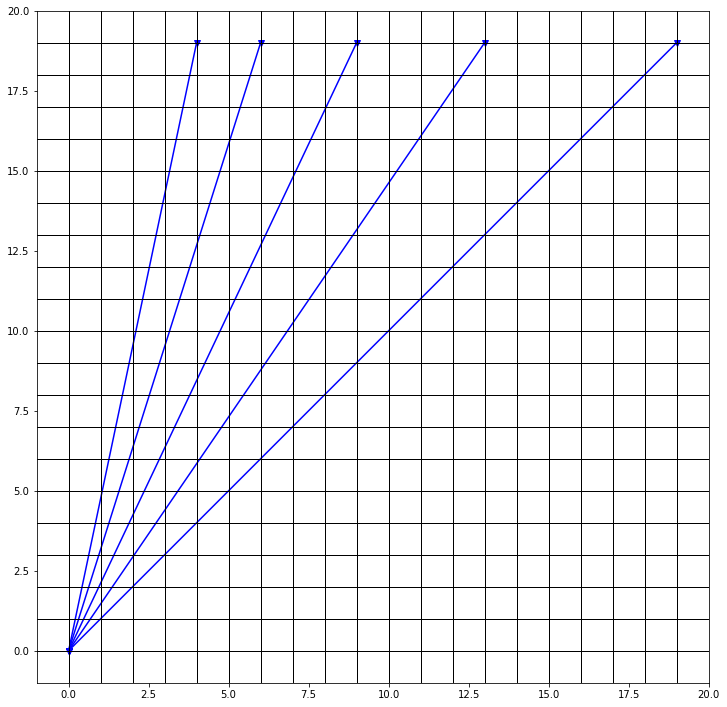

In [12]:
data = np.ones((x_range,y_range)) * np.nan

fig, ax = plt.subplots(1, 1, figsize=(10,10),tight_layout=True)
for x in range(x_range+1):
    ax.axvline(x, lw=1, color='k', zorder=5) # Horizontal 
for y in range(y_range+1):
    ax.axhline(y, lw=1, color='k', zorder=5) # Ordinate
print(m.shape)

for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        for k in range(i,m.shape[0]):
            for l in range(j,m.shape[1]):
                if(m[i,j,k,l]):
                    print("m(({0},{1}),({2},{3}))={4}".format(i,j,k,l,int(m[i,j,k,l])))
                if(m[i,j,k,l]>0):
                    if(i==k and j==l):
                        ax.plot([i, k], [j, l],'bo', linestyle="-")
                    elif(i==k):
                        ax.plot([i+0.08, k+0.08], [j, l],'bv', linestyle="-")
                    elif(j==l):
                        ax.plot([i, k], [j+0.08, l+0.08],'bv',linestyle="-")
                    else:  
                        ax.plot([i, k], [j, l],'bv', linestyle="-")
                if(m[i,j,k,l]<0):
                    if(i==k and j==l):
                        ax.plot([i, k], [j, l],'ro', linestyle="-")
                    elif(i==k):
                        ax.plot([i-0.08, k-0.08], [j, l],'rv', linestyle="-")
                    elif(j==l):
                        ax.plot([i, k], [j-0.08, l-0.08],'rv', linestyle="-")
                    else:  
                        ax.plot([i, k], [j, l], 'rv', linestyle="-")

ax.imshow(data, interpolation='none', extent=[-1,x_range+1, -1, y_range+1], zorder=0)

#ax.axis('off')